<span style='font-size:120%;'>
    <a id='nan'></a>
    <h1 style='color:#142b5a; font-weight: bold; font-family: Cascadia code;'>
        <center> Anomaly Detection Using Gaussian Mixture Probability Model to Implement Intrusion Detection System </center>
    </h1>
</span>

<div style="text-align:center;">
    <img src="cyberattack_1200x627.webp" alt="Machine Learning Project" style="width: 400px; float: right;">
    <img src="1_yyazQ3QnW-gj__noFczZMA.png" style="width: 400px; float: left;">
</div>



<p><h1 style="color:red;font-weight:bolder;">Bussiness Understanding</h1>

<h4 style="color:green;">  Problem Explanation :</h4>

<b>Network intrusion detection systems (NIDS) detect attacks 
or anomalous network traffic patterns in order to avoid cybersecurity issues. Anomaly detection algorithms are used to identify unusual 
behavior or outliers in the network traffic in order to generate alarms. 
Traditionally, Gaussian Mixture Models (GMMs) have been used for 
probabilistic-based anomaly detection NIDS. We propose to use multiple simple GMMs to model each individual feature, and an asymmetric 
voting scheme that aggregates the individual anomaly detectors to provide. We test our approach using the NSL dataset. We construct the 
normal behavior models using only the samples labelled as normal in 
this dataset and evaluate our proposal using the official NSL testing set. 
As a result, we obtain a Fl-score over 0.9, outperforming other supervised and unsupervised proposals. </b>

<h4 style="color:green;">  Business Objectives :</h4>

<p><h1 style="color:red;font-weight:bolder;">Data Understanding</h1></p>

<img src="https://www.fireblazeaischool.in/blogs/wp-content/uploads/2020/06/Python-Libraries-1068x712.png" align='center' style="width:60%;height:82%"></center>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import norm
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix,f1_score

<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Importing the dataset ⬇️ </center>
    </h1>
</div>

In [24]:
 columns = [
        'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
        'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
        'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
        'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate', 'attack', 'level'
    ]

In [25]:
d_raw_train = pd.read_csv('KDDTrain+.txt',names=columns)
d_raw_test = pd.read_csv('KDDTest+.txt',names=columns)

In [26]:
d_raw_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [27]:
d_raw_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


<div style='font-size:100%;'>
    <a id='features'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Definition of features and target 🎯</center>
    </h1>
</div>

In [28]:
d_raw_train.shape

(125973, 43)

In [29]:
d_raw_test.shape

(22544, 43)

<h4 style="color:green;"> Feature description:</h4>



Feature|Description
-------|-----------------
Duration|duration of connection(in seconds)
protocol_type|type of protocol
Service|Network type
Flag|Flag status
Src_bytes|Number of bytes transferred from source to destination
Dst_bytes|Number of bytes transferred from destination to source
Land|If connection is to same host land=1 else 0
Wrong_fragment|Number of wrong fragments
Urgent|Number of urgent packets
Hot|Number of “hot” indicatorsh
Num_failed_logins|Number of failed logins
Logged_in|If logged in logged_in=1else 0
num_compromised|Number of compromised conditions
root_shell|If root shell is obtained root_shell=1 else 0
su_attempted|If “su root” accesses su_attempted=1 else 0
num_root|Number of accessed roots
num_file_creations|Number of file creations
num_shells|Number of shell prompt
num_access_files|Number of operations on access files
num_outbound_cmds|Number of outbound commands
is_host_login|If login is hot is_host_login=1 else 0
is_guest_login|If login is guest is_guest_login=1 else 0
Count_No|Number of connections to the same host in last 2 seconds
srv_count|Number of connections to the same service in last 2 seconds
serror_rate|Percentage of connection with syn error
srv_serror_rate|Percentage of connection with syn error
rerror_rate|Percentage of connection with rej error
srv_rerror_rate|Percentage of connection with rej error
same_srv_rate|Percentage of connection of same service
diff_srv_rate|Percentage of connection of different service
srv_diff_host_rate|Percentage of connection of different hosts
dst_host_count Number|of connections of same destination host
dst_host_srv_count|Number of connections of same destination host and service
dst_host_same_srv_rate|Percentage of connections having same destination host and service
dst_host_diff_srv_rate|Percentage of connections having different service on current host
dst_host_same_src_port_rate|Percentage of connections of current host having same src port
dst_host_srv_diff_host_rate|Percentage of connection of same service and different hosts
dst_host_serror_rate|Percentage of connections of current host having S0 error
dst_host_srv_serror_rate|Percentage of connections of current host of a service having S0 error
dst_host_rerror_rate|Percentage of connections of current host that have rst error
dst_host_srv_rerror_rate|Percentage of connections of current host of service that have rst error
xAttack|Type of attack

In [30]:
d_raw_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [31]:
d_raw_test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [32]:
feature_counts = d_raw_train.dtypes.value_counts()
for dtype, count in feature_counts.items():
    print(f"Number of {dtype} features: {count}")

Number of int64 features: 24
Number of float64 features: 15
Number of object features: 4


<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Explore Descriptive Statistics: ⬇️ </center>
    </h1>
</div>

In [33]:
d_raw_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [34]:
d_raw_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


<div style='font-size:100%;'>
    <a id='dn'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Data Visualization 📊 </center>
    </h1>
</div>

<h4 style="color:green;"> Representation of quantitative variables:</h4>

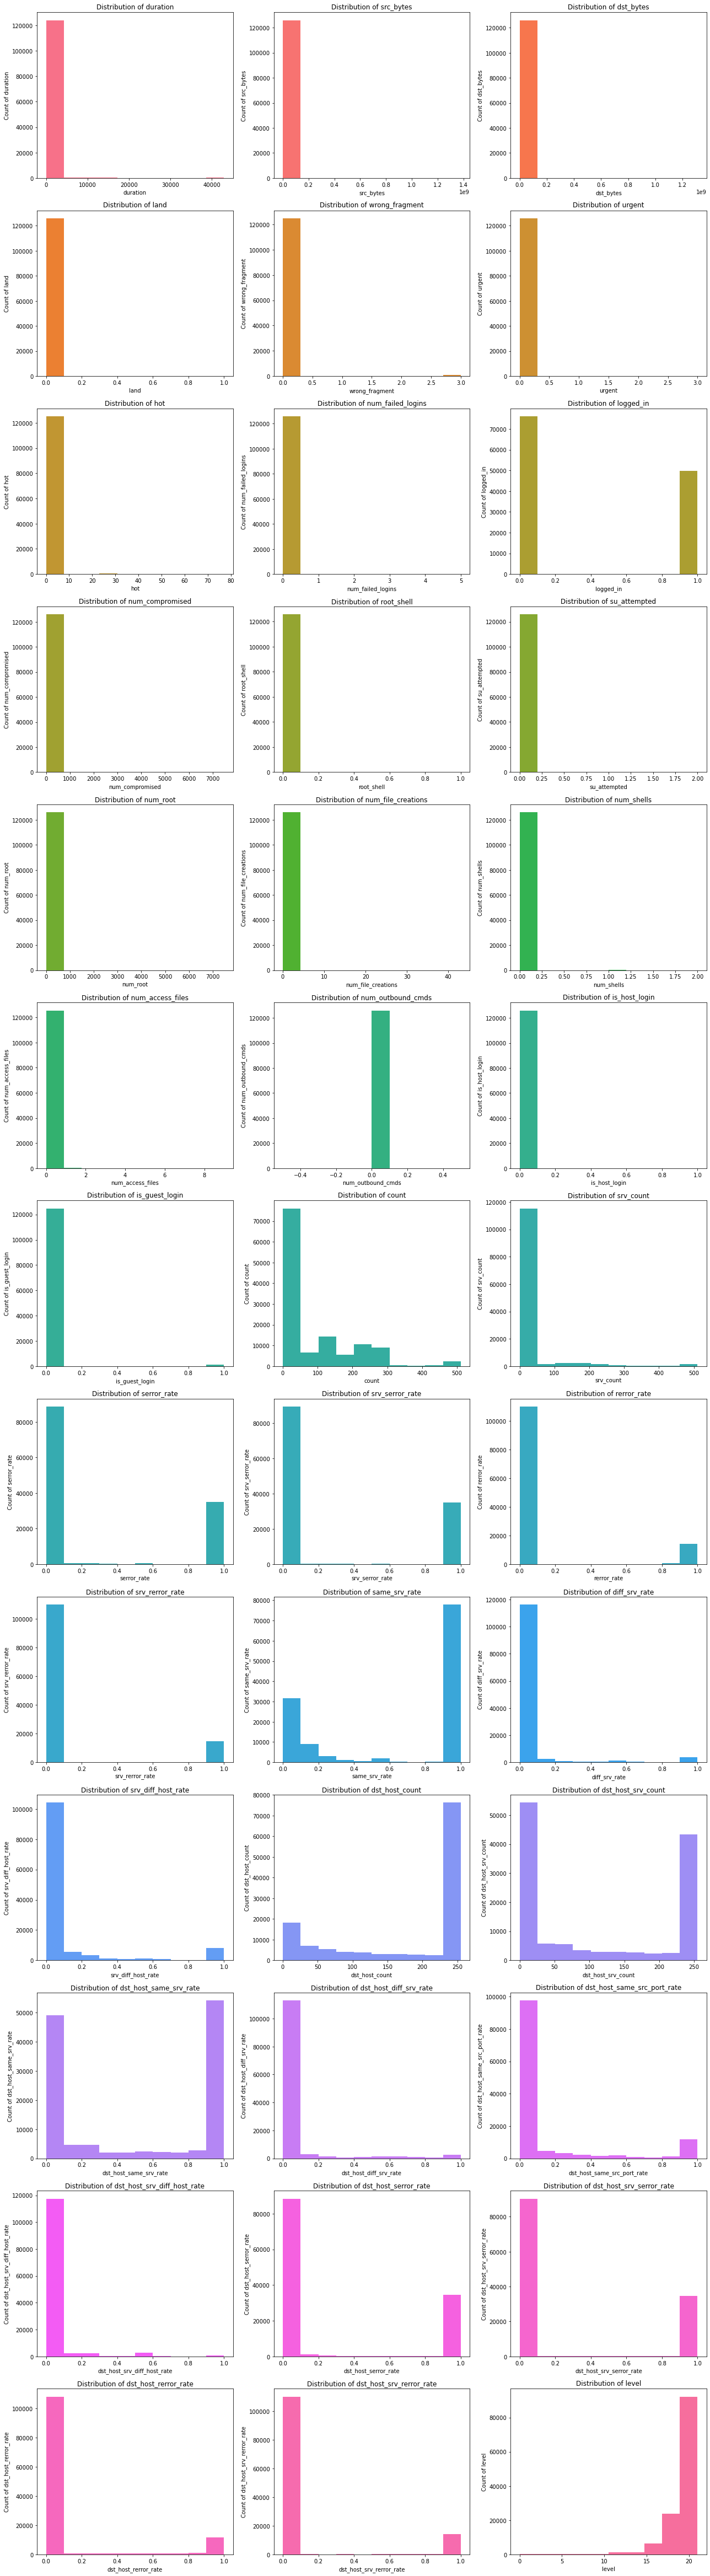

In [35]:
numeric_cols = d_raw_train.select_dtypes('number').columns
num_rows = len(numeric_cols) // 3 + len(numeric_cols) % 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))
axes = axes.flatten()
colors = sns.color_palette("husl", n_colors=len(numeric_cols))
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.hist(d_raw_train[col], color=colors[i])
    ax.set_xlabel(col)
    ax.set_ylabel('Count of {}'.format(col))
    ax.set_title('Distribution of {}'.format(col))
plt.tight_layout()
plt.show()

<h4 style="color:green;"> Representation of qualitative variables:</h4>

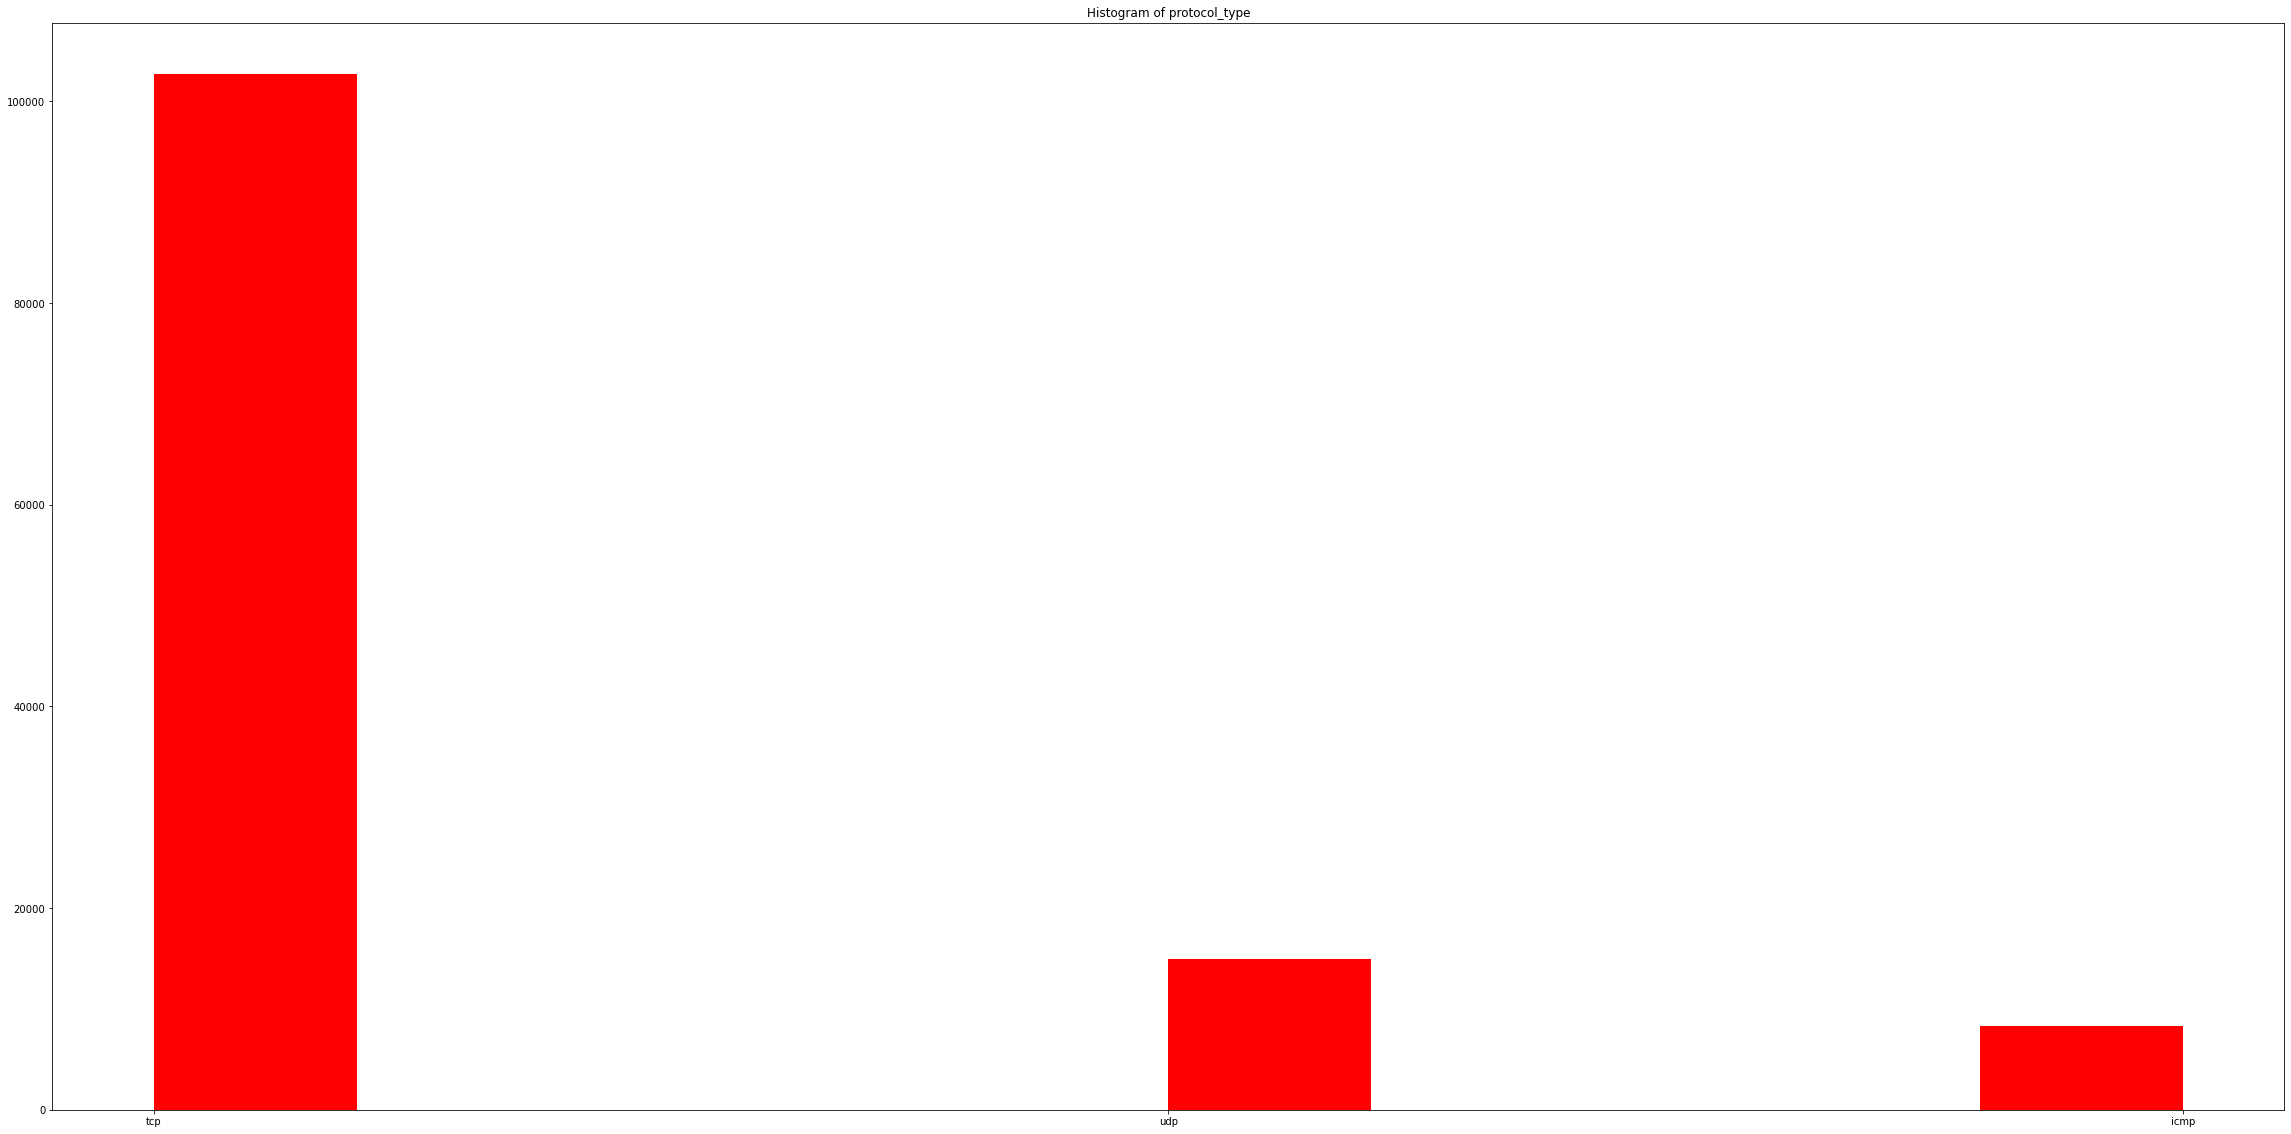

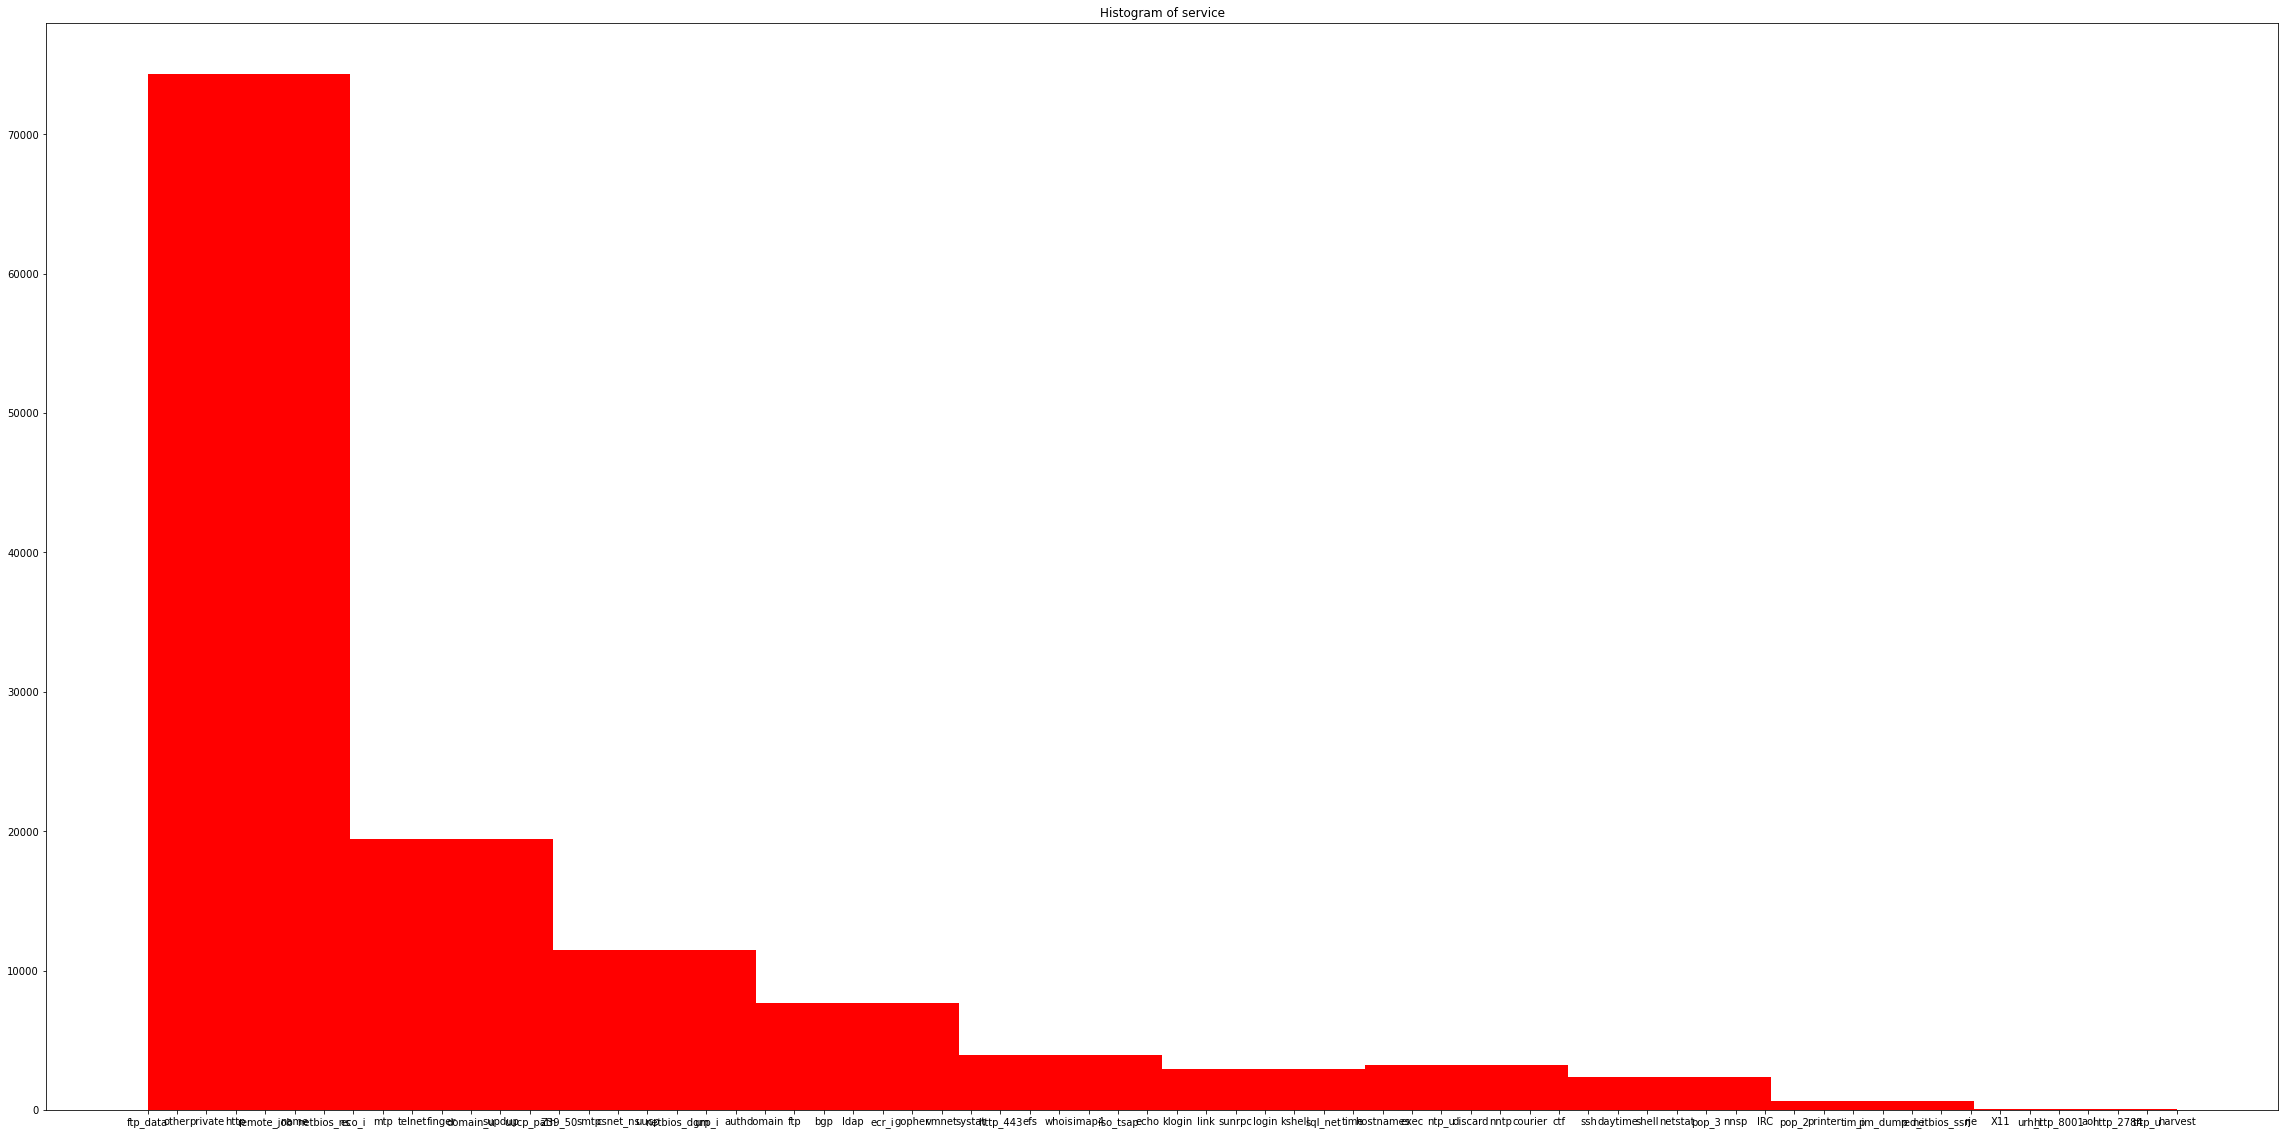

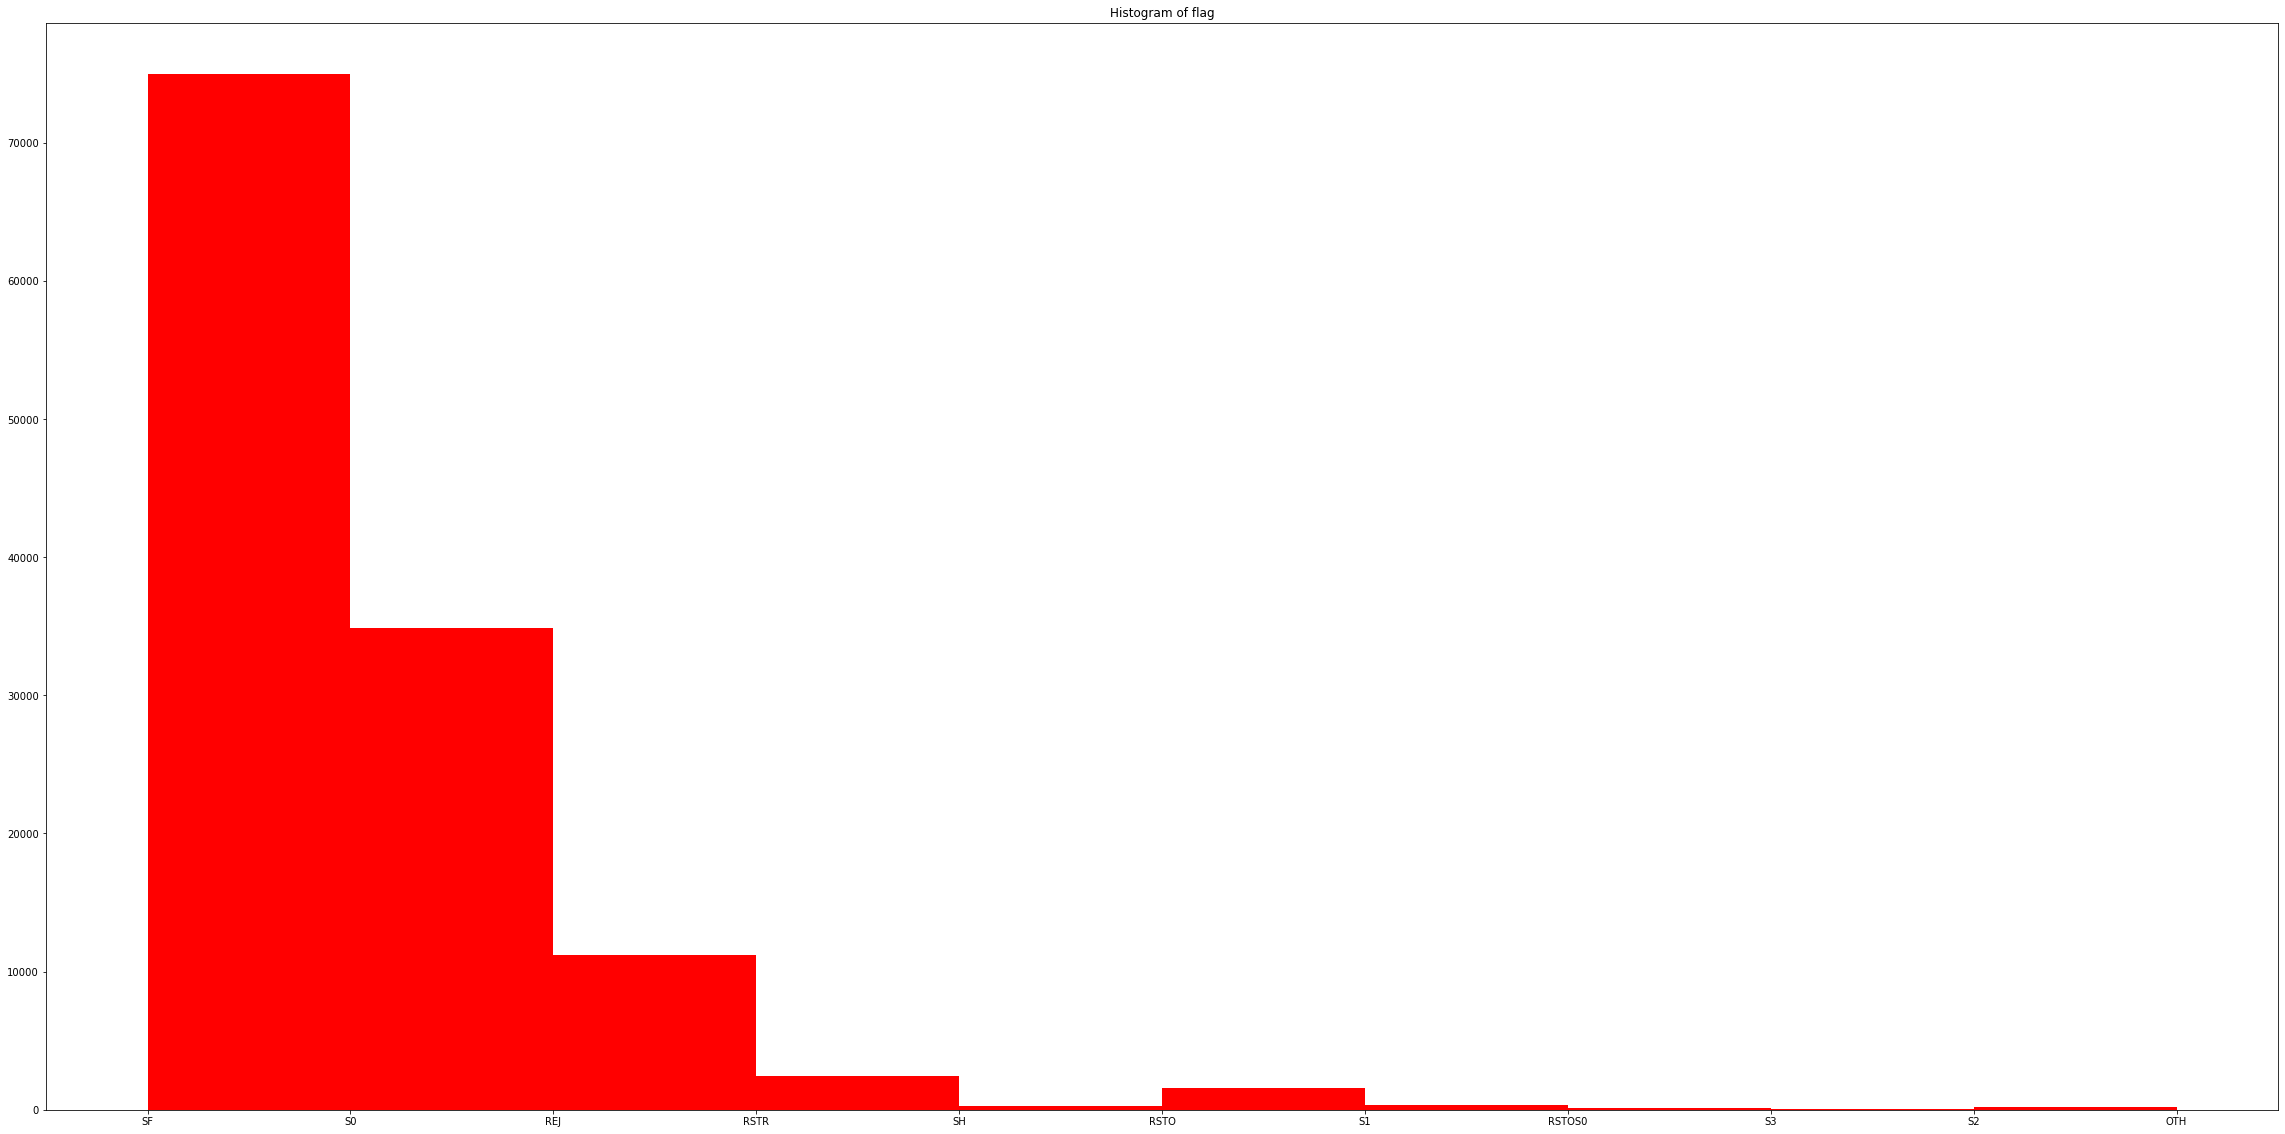

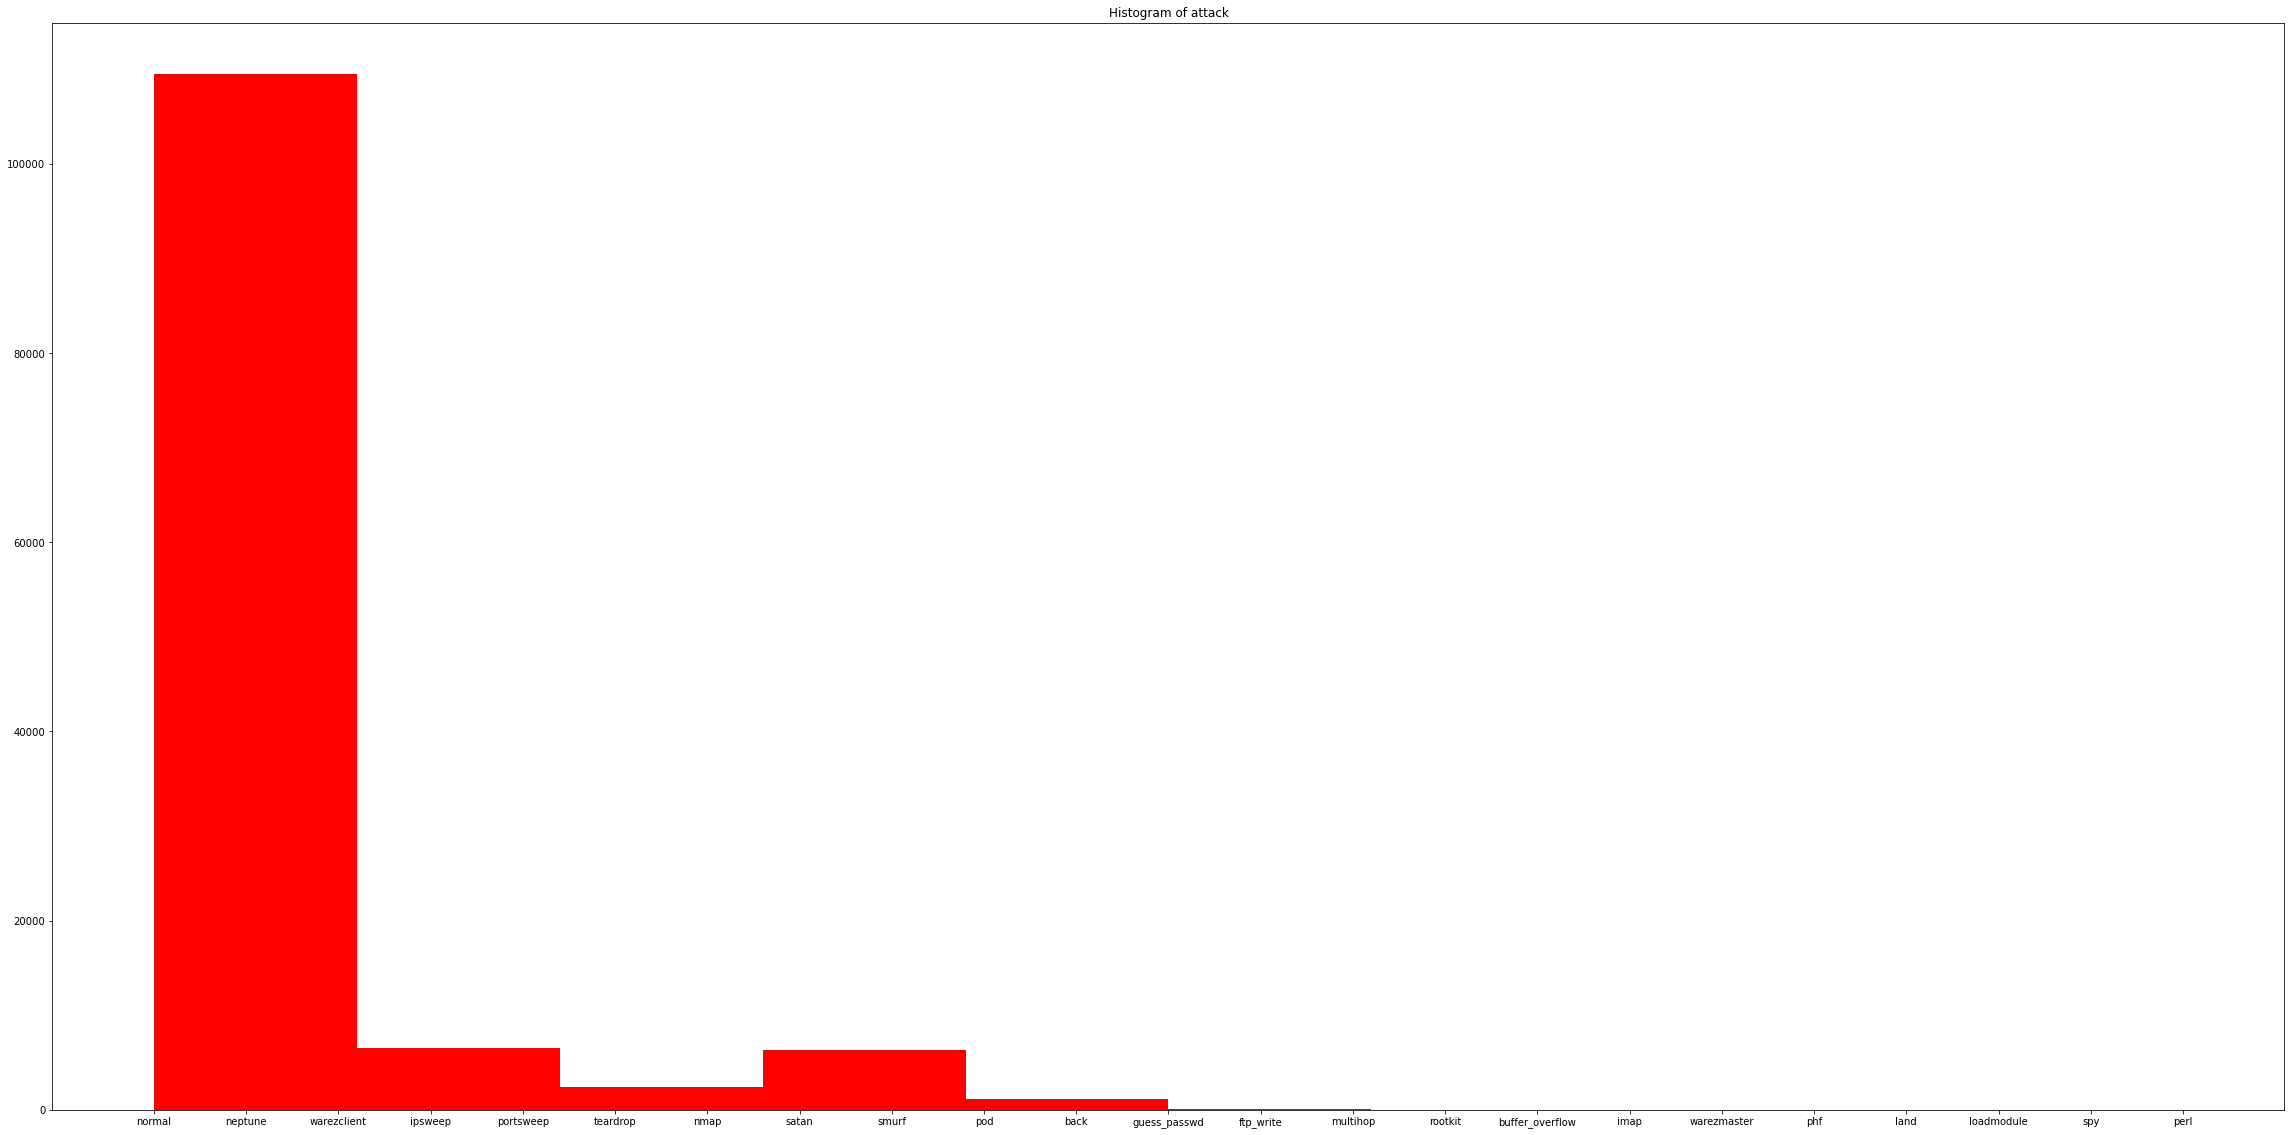

In [36]:
for col in d_raw_train.select_dtypes('object').columns : 
    plt.figure(figsize=(40,20))
    plt.hist(d_raw_train[col],color='red')
    plt.title('Histogram of {}'.format(col))
    plt.show()

<h4 style="color:green;"> Correlation Matrix:</h4>

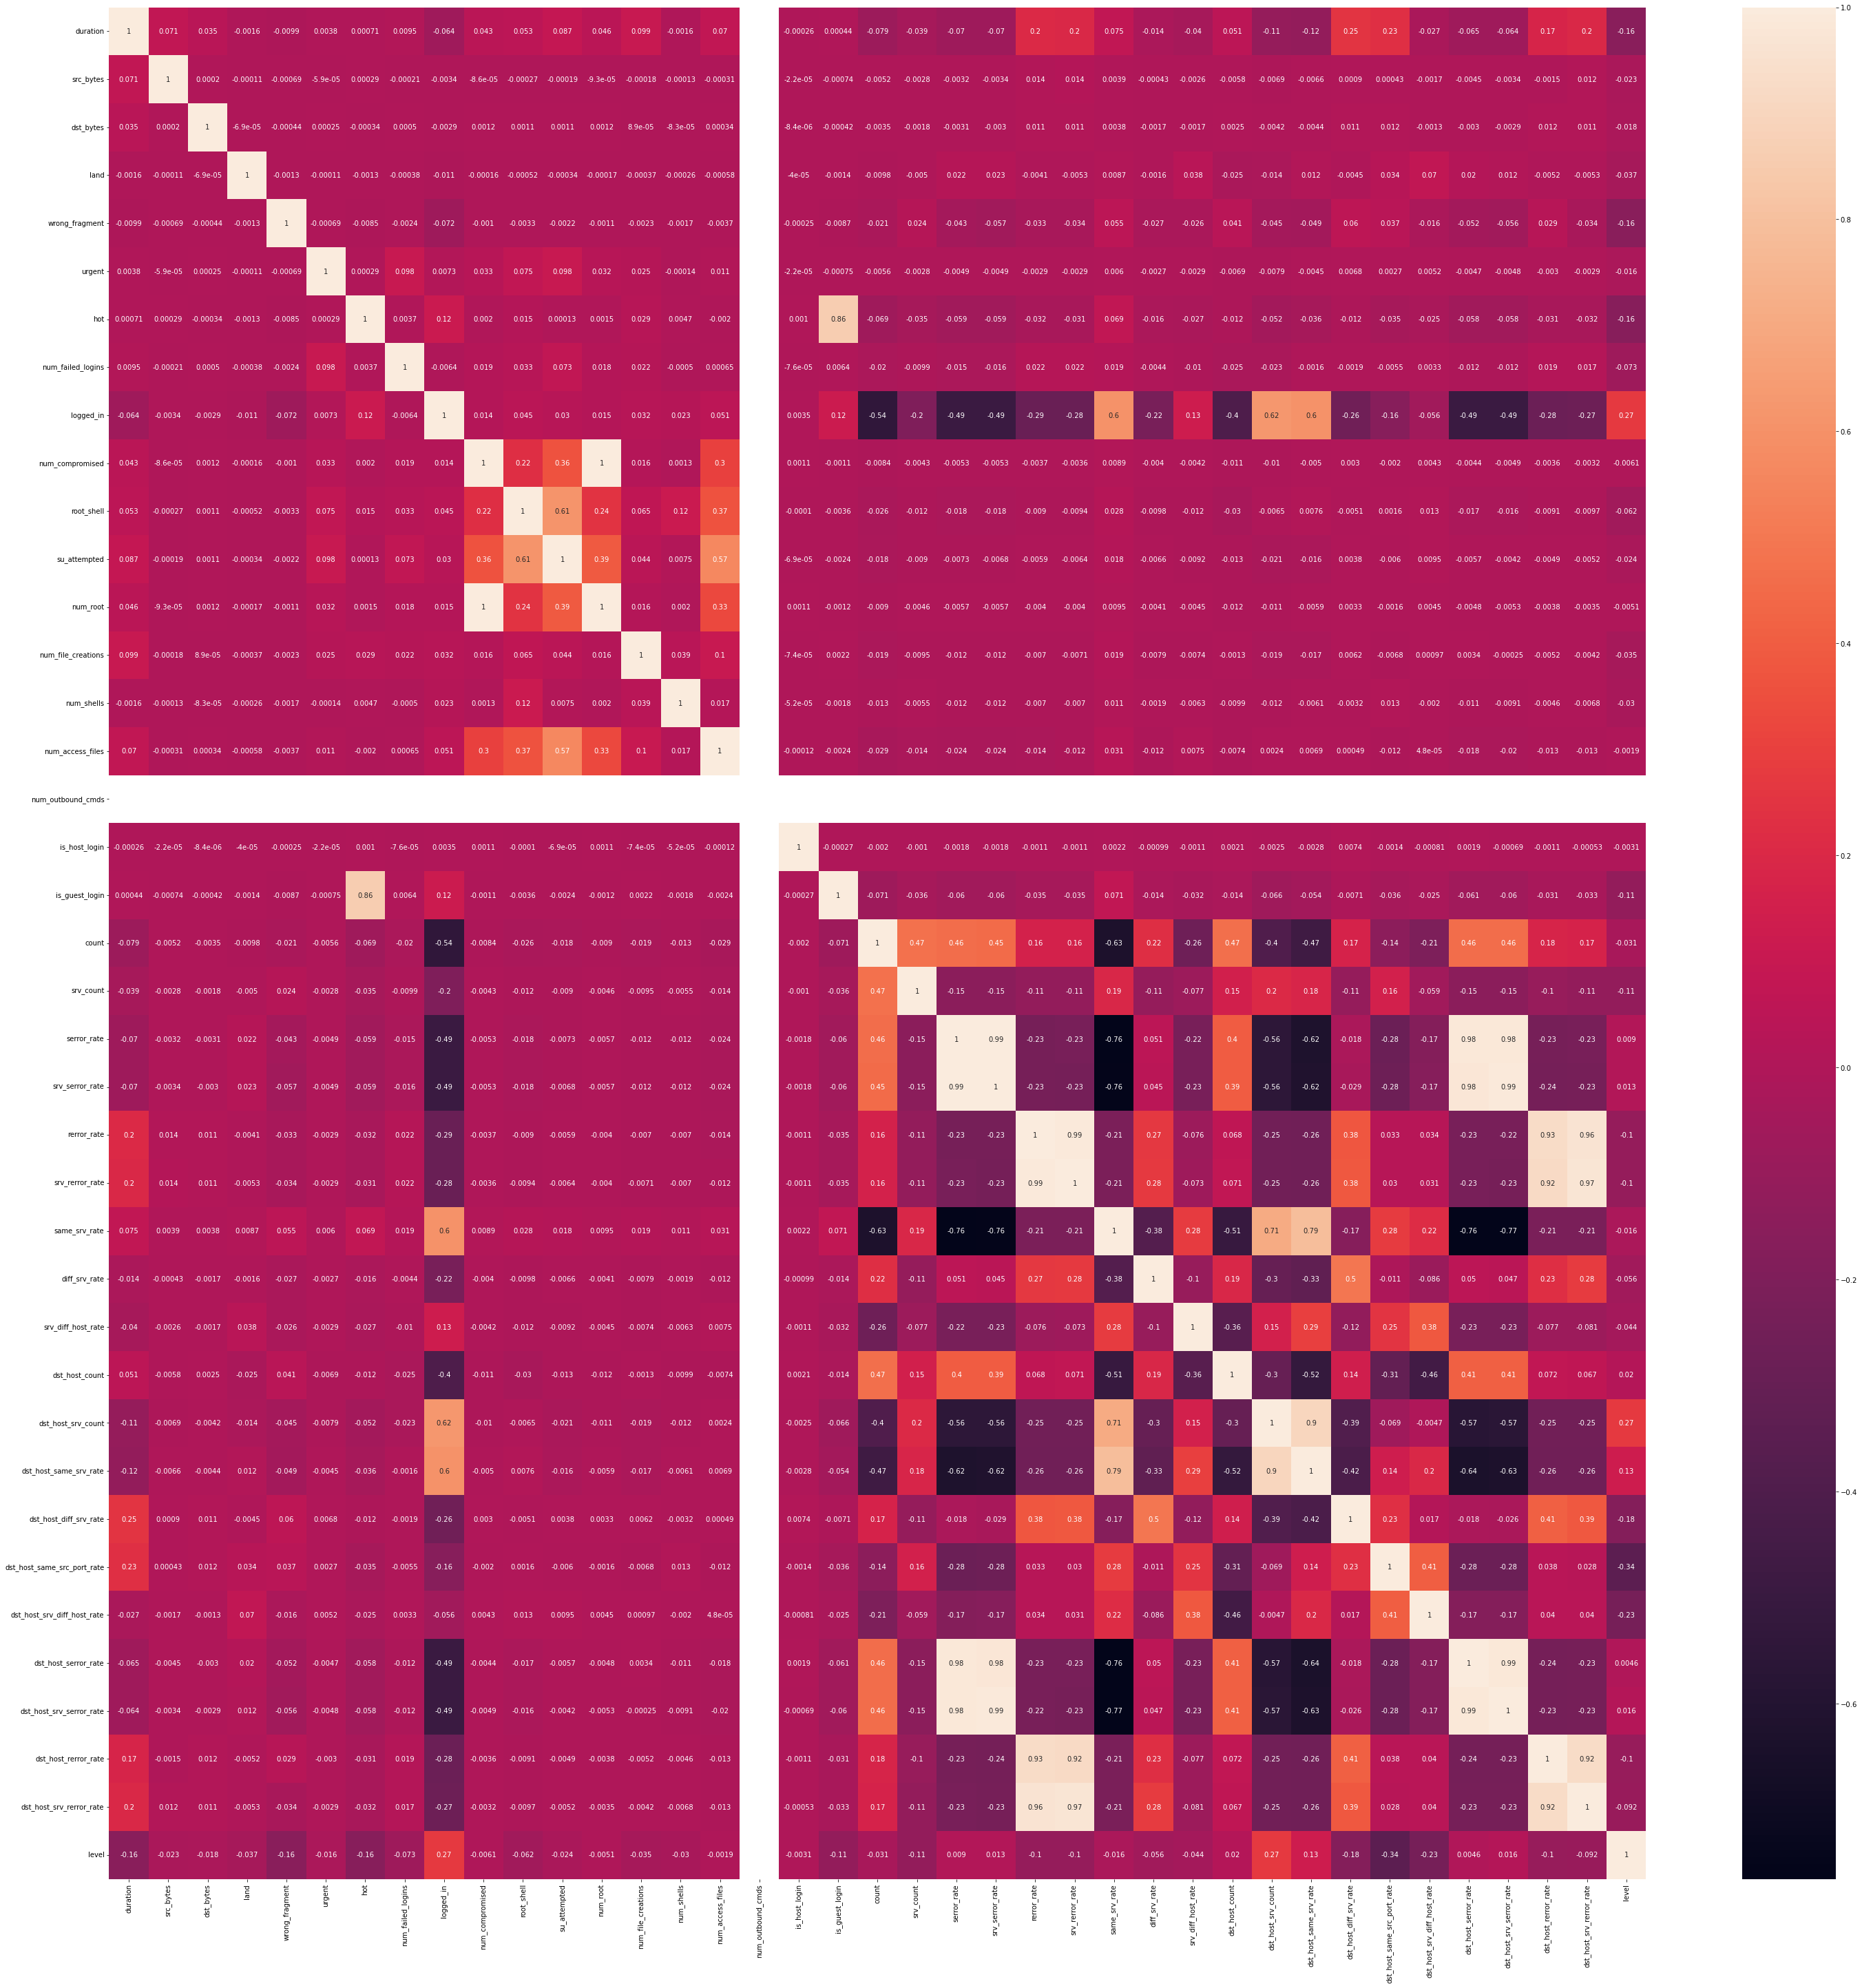

In [37]:
correlations = d_raw_train.corr(method='pearson')
f, ax = plt.subplots(figsize = (50, 50))
sns.heatmap(correlations, annot = True)
plt.show()

<div style='font-size:100%;'>
    <a id='dn'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Handling Outliers 🛑🛑  </center>
    </h1>
</div>

<h4 style="color:green;"> Boxplot:</h4>

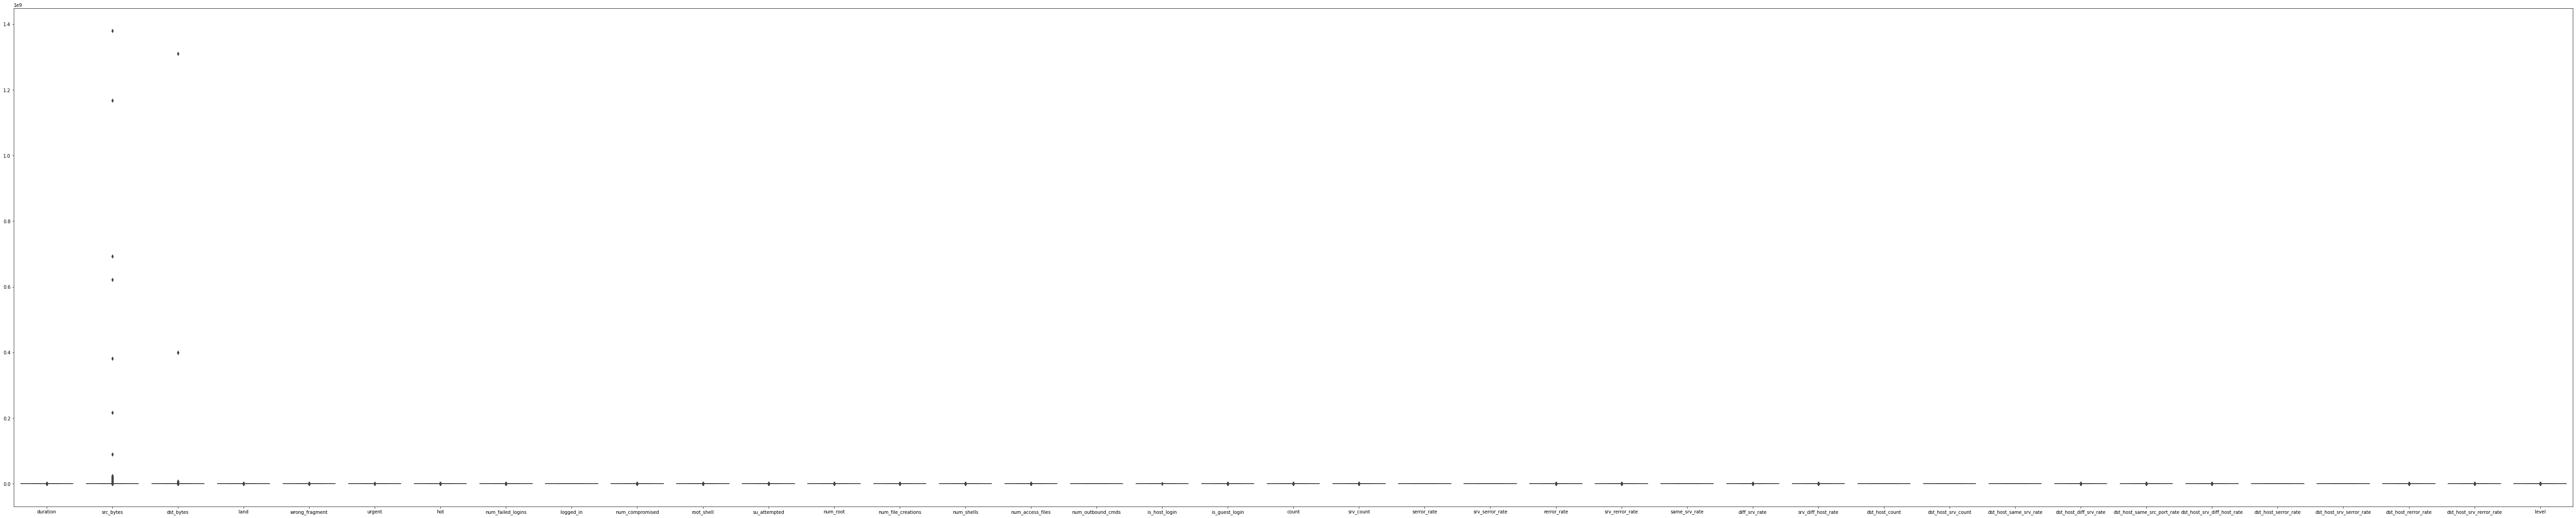

In [38]:
plt.figure(figsize=(100, 20))
sns.boxplot(data=d_raw_train)
plt.show()

<b> ✅While our dataset contains outliers, we've chosen to retain them intentionally as they offer valuable insights or represent unique scenarios critical to understanding the complete spectrum of our data. Not to mention that the features are on the same scall so we don t need to scall it . </b>

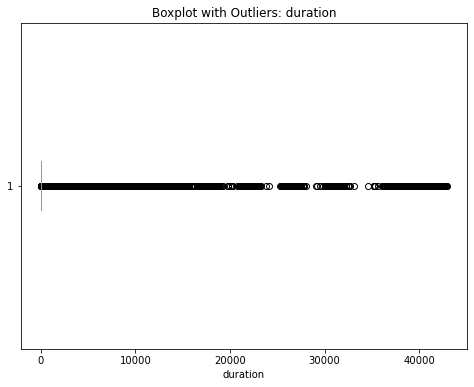

Outliers for duration: 23        5607
25         507
35           1
42           2
43        9052
          ... 
125866      28
125876       5
125944       1
125957       1
125969       8
Name: duration, Length: 10018, dtype: int64


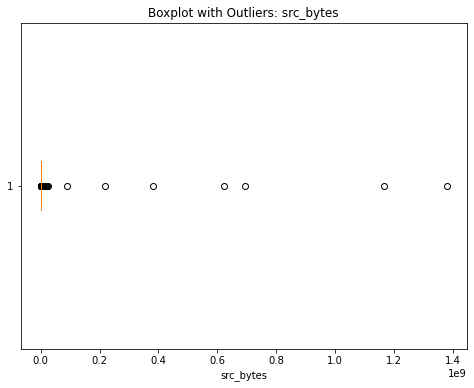

Outliers for src_bytes: 42        1591
65         696
95        3065
111       2089
127       1079
          ... 
125944    2049
125952    1289
125957    1247
125965    2233
125970    2231
Name: src_bytes, Length: 13840, dtype: int64


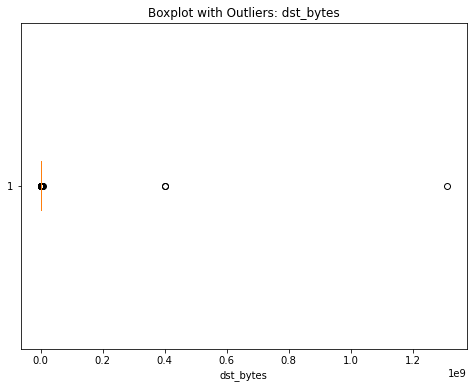

Outliers for dst_bytes: 3          8153
12         2251
16        13788
22        11905
25        14421
          ...  
125941    12471
125954    10939
125959     4777
125961     2698
125963     1600
Name: dst_bytes, Length: 23579, dtype: int64


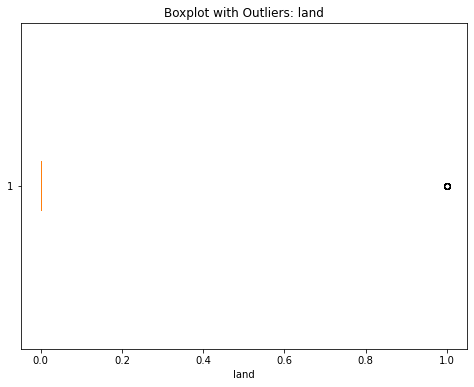

Outliers for land: 13210     1
16015     1
26748     1
37107     1
38774     1
47492     1
52662     1
59752     1
62554     1
63005     1
64190     1
66481     1
67588     1
72491     1
73452     1
82725     1
85275     1
89324     1
89411     1
101543    1
105684    1
112222    1
112310    1
113810    1
121116    1
Name: land, dtype: int64


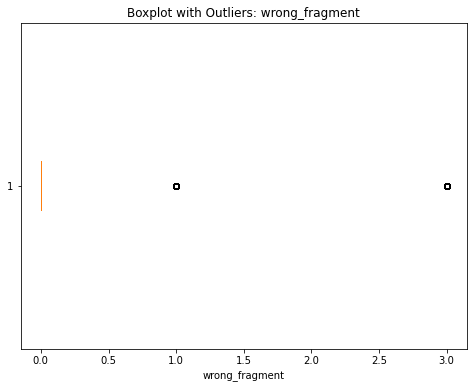

Outliers for wrong_fragment: 46        3
52        3
104       3
184       3
211       1
         ..
125323    3
125333    3
125435    3
125798    3
125950    3
Name: wrong_fragment, Length: 1090, dtype: int64


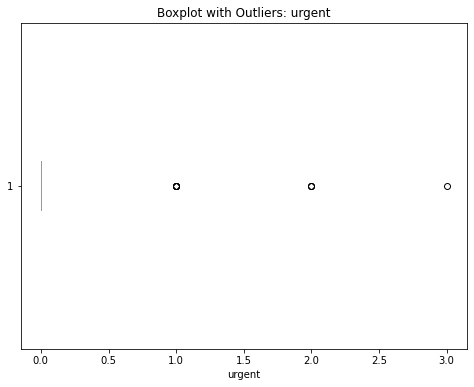

Outliers for urgent: 3173      1
32978     3
88122     2
89785     2
90778     1
101086    2
103959    1
111610    1
115868    1
Name: urgent, dtype: int64


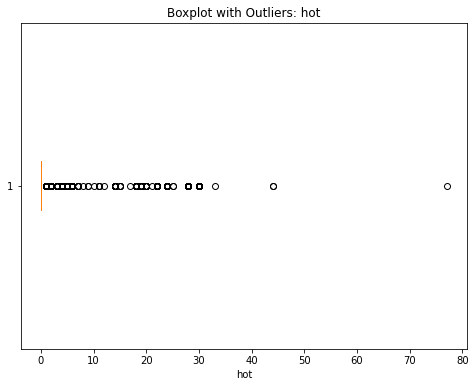

Outliers for hot: 129        5
190        6
303        4
366        2
405        1
          ..
125851    30
125866    18
125877     2
125910     2
125929     2
Name: hot, Length: 2671, dtype: int64


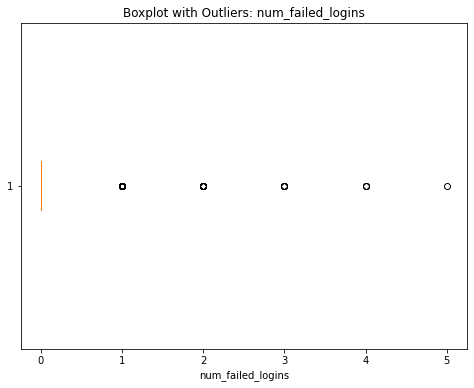

Outliers for num_failed_logins: 405       2
689       1
1792      1
1914      1
2798      1
         ..
122128    1
122977    1
124825    1
125065    1
125118    1
Name: num_failed_logins, Length: 122, dtype: int64


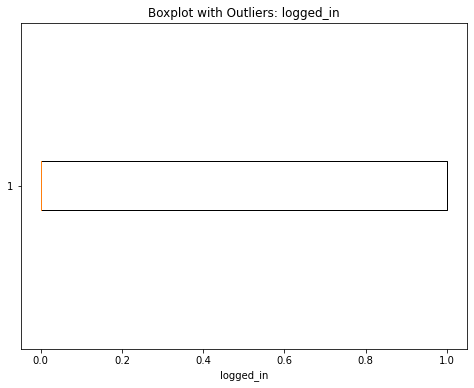

Outliers for logged_in: Series([], Name: logged_in, dtype: int64)


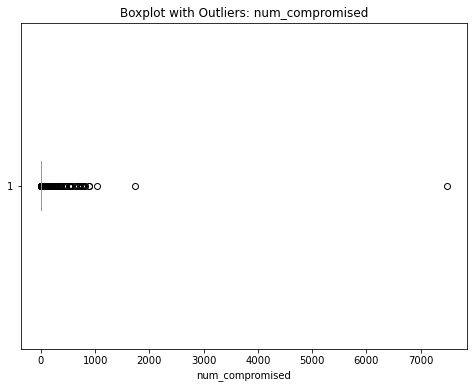

Outliers for num_compromised: 25          3
278         2
366         1
405        19
466         1
         ... 
125756    375
125807     11
125877      1
125910      1
125929      1
Name: num_compromised, Length: 1286, dtype: int64


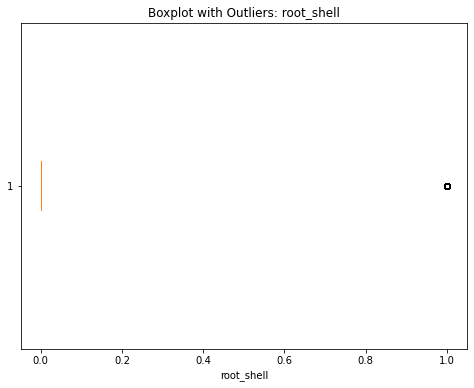

Outliers for root_shell: 1333      1
1463      1
2694      1
2993      1
3005      1
         ..
121483    1
122637    1
122920    1
123880    1
125756    1
Name: root_shell, Length: 169, dtype: int64


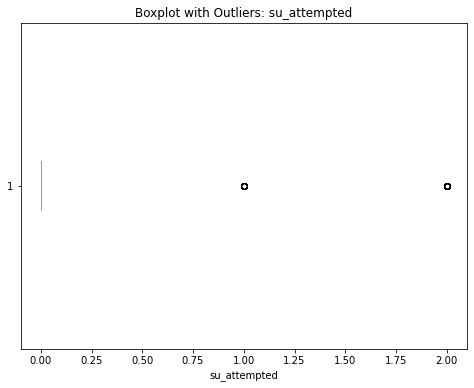

Outliers for su_attempted: 405       1
2407      1
4525      1
4677      2
4915      1
         ..
120354    2
120618    2
121262    2
123880    2
125756    2
Name: su_attempted, Length: 80, dtype: int64


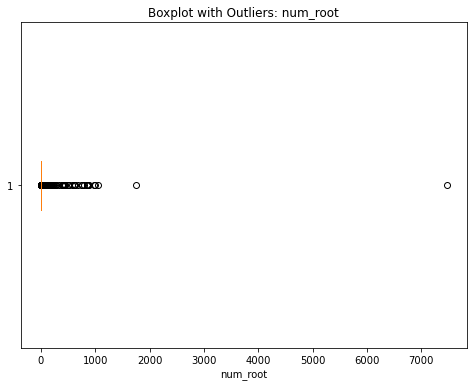

Outliers for num_root: 156         9
405        10
955         1
957         5
1226        9
         ... 
125357      1
125756    425
125768      6
125804      1
125943      5
Name: num_root, Length: 649, dtype: int64


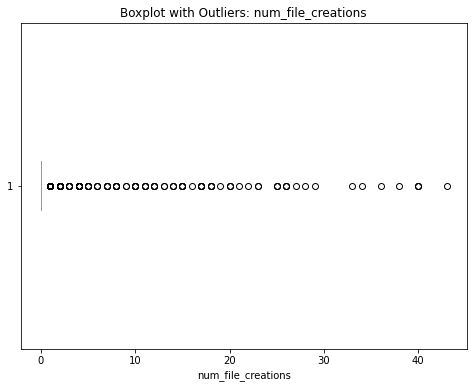

Outliers for num_file_creations: 127        1
405        8
2294       1
3005       4
3106       2
          ..
124137     1
124279     1
124327     2
124987    25
125369     1
Name: num_file_creations, Length: 287, dtype: int64


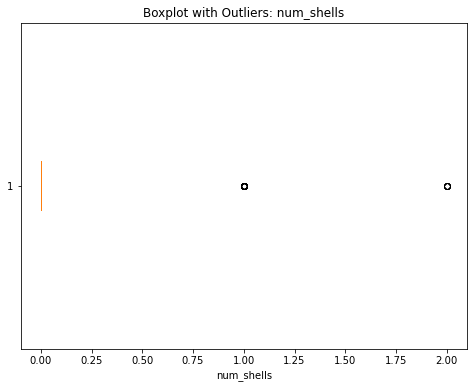

Outliers for num_shells: 3005      1
5097      1
5213      1
6784      1
7744      1
9648      1
16146     1
16476     1
17076     1
25995     1
26815     1
34654     1
43226     1
44610     1
48750     2
50731     1
54357     1
56375     1
61752     1
64331     1
65145     1
66007     1
66884     1
68279     1
69147     1
69195     1
69490     2
70027     1
77945     2
81498     1
81702     2
82345     2
86502     1
89514     1
95403     1
97385     1
98093     1
98445     1
98618     1
101585    1
104397    1
104451    1
107142    1
112579    1
114239    1
120362    1
124638    1
Name: num_shells, dtype: int64


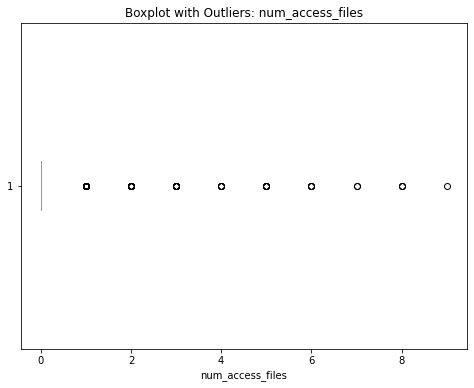

Outliers for num_access_files: 25        1
208       1
698       1
950       1
995       1
         ..
124862    1
125012    1
125756    1
125770    1
125961    1
Name: num_access_files, Length: 371, dtype: int64


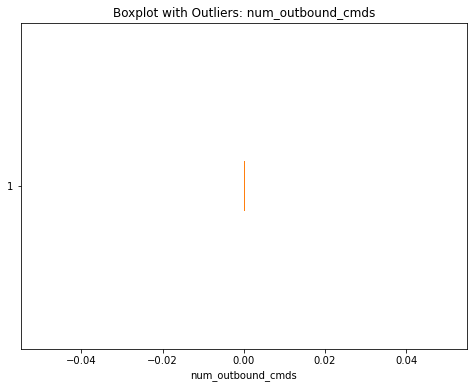

Outliers for num_outbound_cmds: Series([], Name: num_outbound_cmds, dtype: int64)


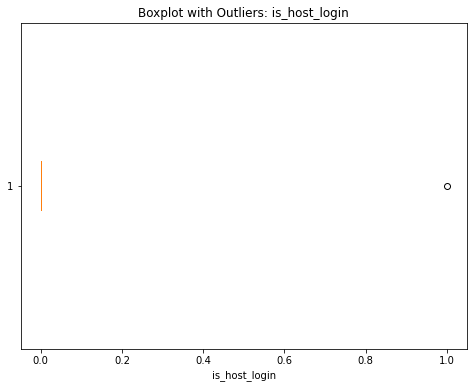

Outliers for is_host_login: 82775    1
Name: is_host_login, dtype: int64


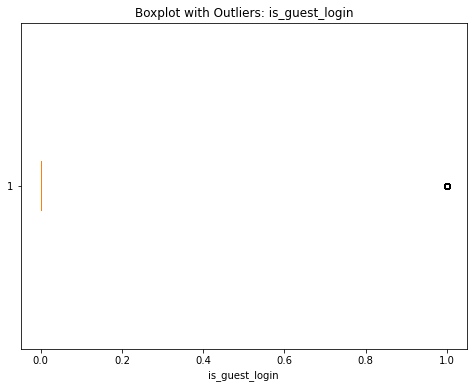

Outliers for is_guest_login: 129       1
190       1
506       1
525       1
581       1
         ..
125363    1
125441    1
125485    1
125851    1
125866    1
Name: is_guest_login, Length: 1187, dtype: int64


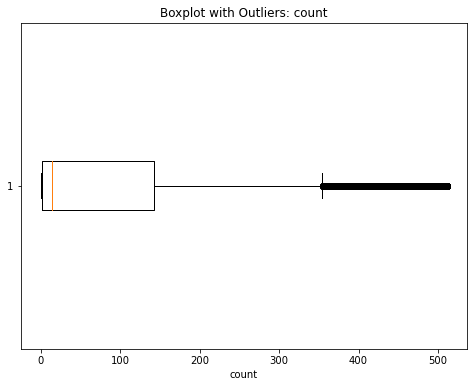

Outliers for count: 172       511
177       486
198       406
354       425
426       486
         ... 
125687    509
125695    509
125707    509
125780    511
125927    511
Name: count, Length: 3157, dtype: int64


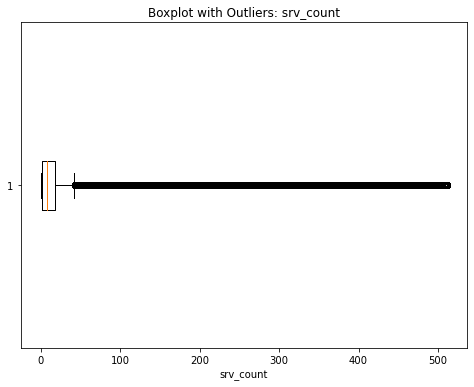

Outliers for srv_count: 34        181
36        202
46         80
47         44
54        120
         ... 
125886    157
125895    141
125921    335
125927    511
125936     46
Name: srv_count, Length: 12054, dtype: int64


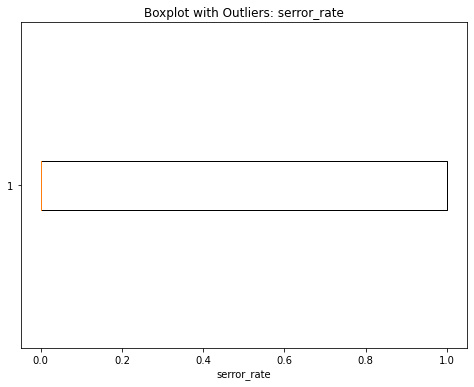

Outliers for serror_rate: Series([], Name: serror_rate, dtype: float64)


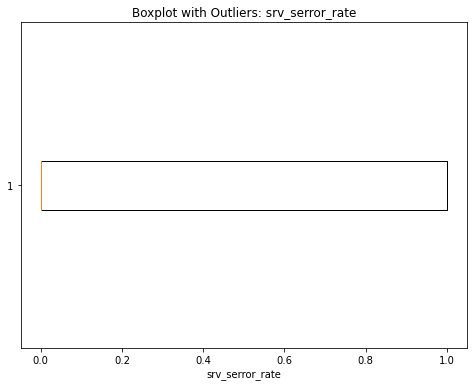

Outliers for srv_serror_rate: Series([], Name: srv_serror_rate, dtype: float64)


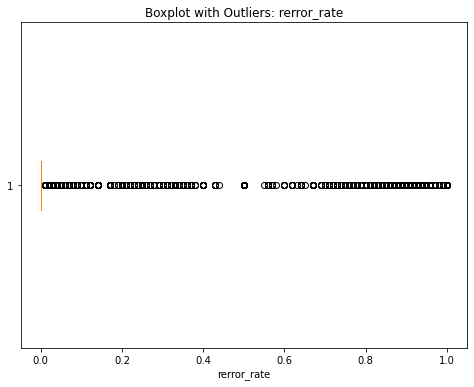

Outliers for rerror_rate: 5         1.00
10        1.00
29        0.03
33        1.00
51        1.00
          ... 
125917    0.03
125918    1.00
125932    1.00
125949    1.00
125955    1.00
Name: rerror_rate, Length: 16190, dtype: float64


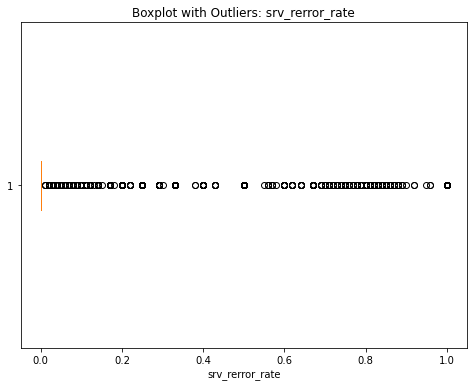

Outliers for srv_rerror_rate: 5         1.00
10        1.00
29        0.03
33        1.00
51        1.00
          ... 
125918    1.00
125932    1.00
125933    0.12
125949    1.00
125955    1.00
Name: srv_rerror_rate, Length: 16206, dtype: float64


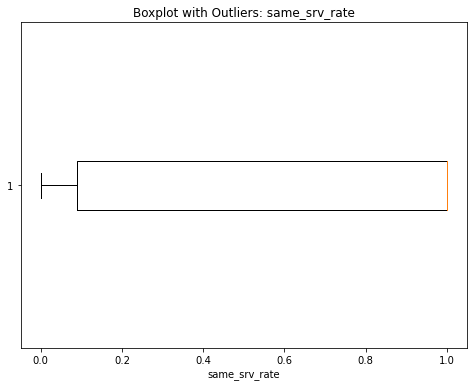

Outliers for same_srv_rate: Series([], Name: same_srv_rate, dtype: float64)


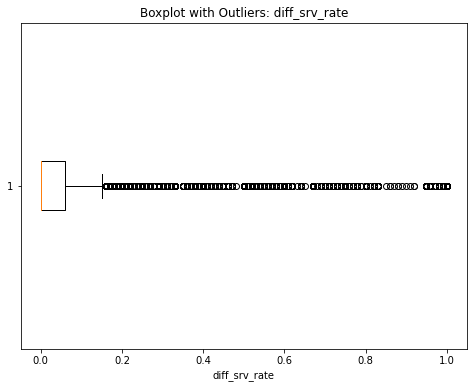

Outliers for diff_srv_rate: 33        1.00
43        0.50
62        1.00
72        0.67
89        0.67
          ... 
125821    0.40
125828    0.23
125887    1.00
125902    0.17
125956    0.67
Name: diff_srv_rate, Length: 7788, dtype: float64


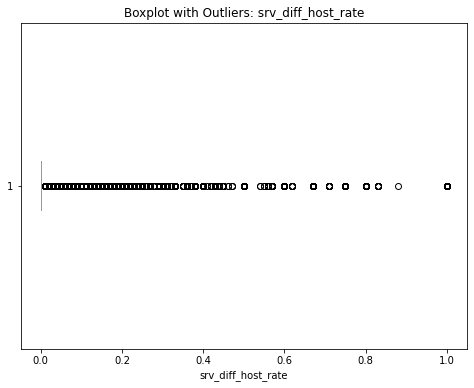

Outliers for srv_diff_host_rate: 4         0.09
12        0.43
16        0.22
19        0.20
22        0.20
          ... 
125949    1.00
125954    0.15
125955    1.00
125962    1.00
125967    0.18
Name: srv_diff_host_rate, Length: 28399, dtype: float64


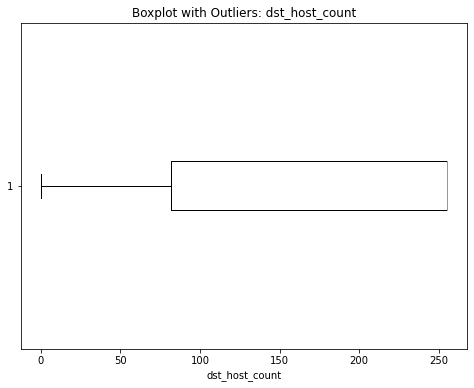

Outliers for dst_host_count: Series([], Name: dst_host_count, dtype: int64)


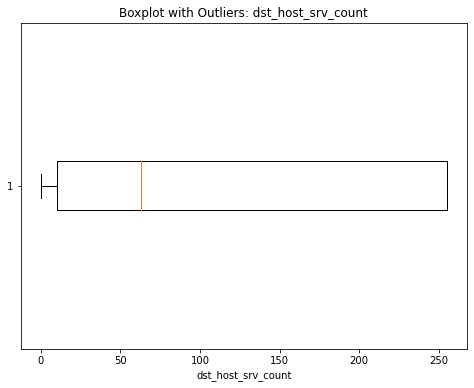

Outliers for dst_host_srv_count: Series([], Name: dst_host_srv_count, dtype: int64)


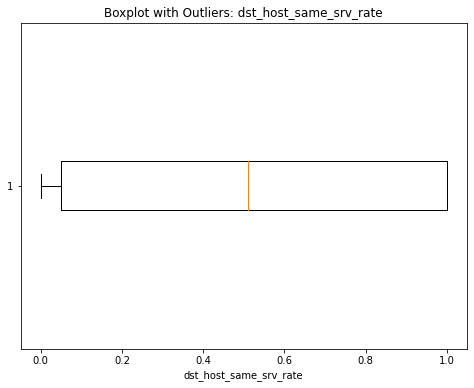

Outliers for dst_host_same_srv_rate: Series([], Name: dst_host_same_srv_rate, dtype: float64)


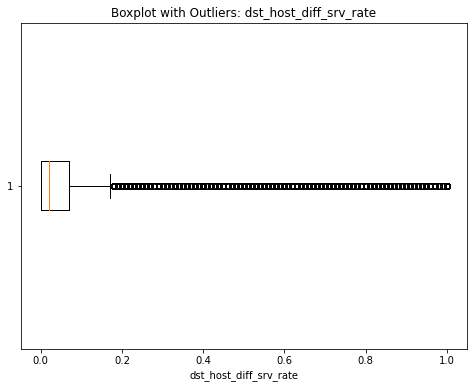

Outliers for dst_host_diff_srv_rate: 1         0.60
23        0.85
33        0.31
43        0.66
62        0.84
          ... 
125843    1.00
125851    0.43
125878    0.47
125931    0.82
125943    0.33
Name: dst_host_diff_srv_rate, Length: 10550, dtype: float64


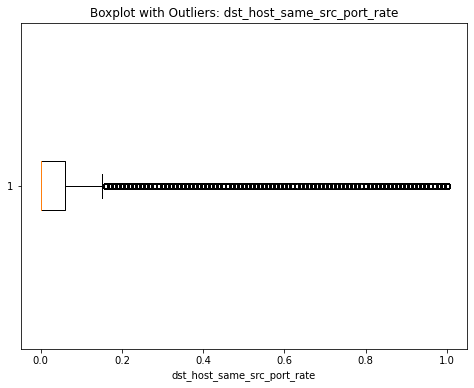

Outliers for dst_host_same_src_port_rate: 0         0.17
1         0.88
13        1.00
17        1.00
23        1.00
          ... 
125947    1.00
125955    1.00
125965    1.00
125967    0.33
125972    0.30
Name: dst_host_same_src_port_rate, Length: 25052, dtype: float64


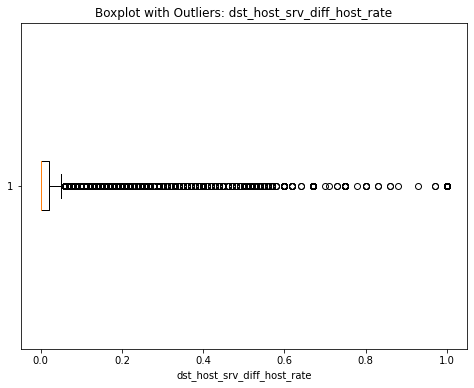

Outliers for dst_host_srv_diff_host_rate: 13        0.20
17        1.00
27        0.14
30        0.51
48        0.18
          ... 
125912    0.51
125932    0.23
125947    0.25
125955    0.06
125965    1.00
Name: dst_host_srv_diff_host_rate, Length: 11682, dtype: float64


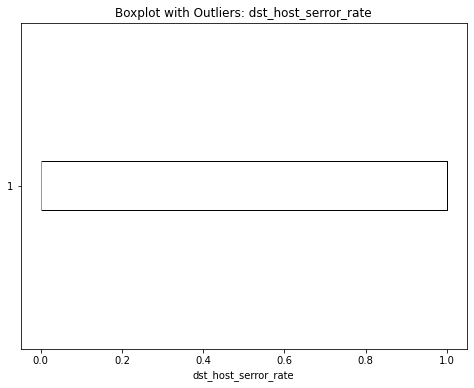

Outliers for dst_host_serror_rate: Series([], Name: dst_host_serror_rate, dtype: float64)


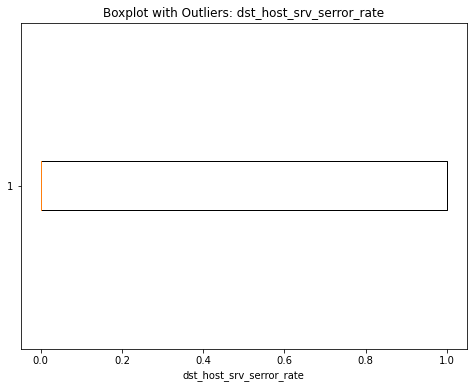

Outliers for dst_host_srv_serror_rate: Series([], Name: dst_host_srv_serror_rate, dtype: float64)


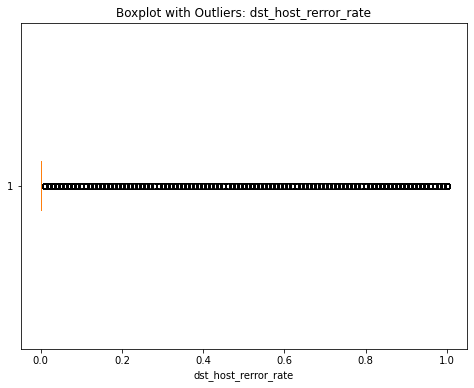

Outliers for dst_host_rerror_rate: 0         0.05
5         1.00
10        1.00
18        0.02
25        0.02
          ... 
125931    0.76
125932    1.00
125952    0.02
125955    1.00
125970    0.01
Name: dst_host_rerror_rate, Length: 22795, dtype: float64


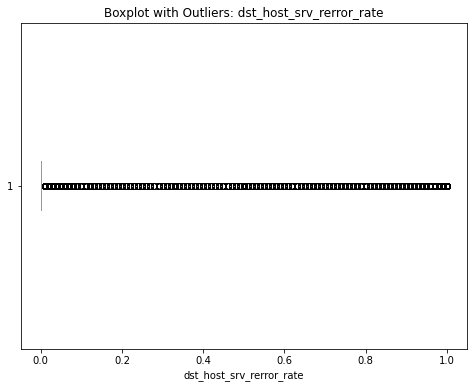

Outliers for dst_host_srv_rerror_rate: 3         0.01
5         1.00
10        1.00
25        0.16
27        0.57
          ... 
125918    0.84
125929    0.05
125931    0.02
125932    0.93
125955    1.00
Name: dst_host_srv_rerror_rate, Length: 19357, dtype: float64


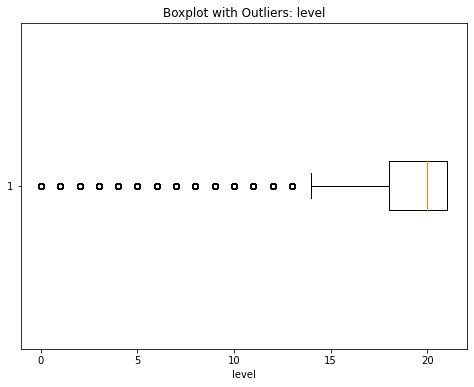

Outliers for level: 48        12
148       11
190        2
222       12
278       11
          ..
125721    13
125729     7
125736    10
125877    12
125929    11
Name: level, Length: 2995, dtype: int64


In [39]:
# Choose the variables for outlier detection
variables = ['duration', 'src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','level']

# Iterate over the variables
for variable in variables:
    # Select the data for the current variable
    data = d_raw_train[variable]

    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plot the boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, vert=False)
    plt.xlabel(variable)
    plt.title('Boxplot with Outliers: ' + variable)
    plt.show()

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print('Outliers for', variable + ':', outliers)

<p><h1 style="color:red;font-weight:bolder;"> Data Preparation</h1></p> 

<div style='font-size:100%;'>
    <a id='dn'></a>
    <h1 style=' font-weight: bold; font-family: Cascadia code;'>
        <center> Handeling Missing Values 🔦 </center>
    </h1>
</div>

In [40]:
print(('We have {} missing values in out Train set\nWe have {} missing values in the Test set').format(d_raw_train.isna().sum().sum(),d_raw_test.isna().sum().sum()))

We have 0 missing values in out Train set
We have 0 missing values in the Test set


In [41]:
print(d_raw_train.duplicated().sum())
print(d_raw_test.duplicated().sum())

0
0


<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Since we have 8 datasets to create and alter , first we have to create the functions needed to apply on the raw datasets 🎯</center>
    </h1>
</div>

<h4 style="color:green;"> Filter Function  : Filtering the raw Data:</h4>

In [42]:
def filter_raw(df):
    columns_to_drop = [
        'service', 'flag', 'src_bytes', 'dst_bytes', 'urgent', 'num_failed_logins', 'num_compromised', 'root_shell',
        'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login',
        'is_guest_login', 'num_outbound_cmds', 'wrong_fragment', 'level'
    ]
    
    # Dropping the specified columns
    df.drop(columns=columns_to_drop, axis=1, inplace=True)
    
    # Filtering rows where protocol_type is 'tcp'
    df = df[df.protocol_type == 'tcp']
    #dropping the protocol_type column beacause it's no longer usefull
    df.drop('protocol_type',axis=1,inplace=True)
    
    # Encoding the 'attack' column (0: 'normal', 1: 'anomaly')
    df.attack = df.attack.map(lambda x: 0 if x == 'normal' else 1)
    
    
    return df


<h4 style="color:green;"> Normalizer Function : Normalizing the data</h4>

In [43]:
def normalize(df) :
    for col in df.select_dtypes('number').columns :
        df[col] = (df[col]-df[col].mean())/(max(df[col])-min(df[col]))
    return df

<h4 style="color:green;"> PCA Function : applies PCA to the Data</h4>

In [44]:
def perform_PCA(data, dim=None, plot=True):
    # Initializing PCA
    pca = PCA()

    # Fitting PCA to the data
    pca.fit(data)

    # Calculating the cumulative explained variance ratios
    cum_vars = np.cumsum(pca.explained_variance_ratio_)

    # Plotting cumulative explained variance if plot=True
    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(cum_vars, marker='o')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('Cumulative Explained Variance vs Number of Components')
        plt.axhline(y=0.999, color='r', linestyle='--', label='0.999 Variance')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Finding the index where cumulative variance reaches or exceeds 0.999
    i = np.argmax(cum_vars >= 0.999) + 1  # Adding 1 to get the actual count of components

    # Checking if a specific dimension is specified for PCA
    if dim:
        # Creating a new PCA instance with the specified dimension
        pca = PCA(n_components=dim)

        # Transforming the data into the specified dimension
        transformed_data = pca.fit_transform(data)

        # Returning the transformed data as a DataFrame
        return pd.DataFrame(transformed_data)
    
    # If no specific dimension is provided, use the components that explain 0.999 variance
    pca = PCA(n_components=i)

    # Transforming the data based on the identified number of components
    transformed_data = pca.fit_transform(data)

    # Returning the transformed data and the number of components used
    return pd.DataFrame(transformed_data), i

<h4 style="color:green;"> FGMPM Function </h4>

In [45]:
  # For progress visualization

def GMM_Combine_Transform(origin_data, data, threshold):
    matrix = []
    abnormal_count = 0

    for i in tqdm(range(len(data))):
        row_probs = calculate_row_probabilities(origin_data, data.iloc[i, :])
        matrix.append(row_probs)

        if any(prob <= threshold for prob in row_probs):
            abnormal_count += 1

    return matrix, abnormal_count

def calculate_row_probabilities(data, values):
    row_probs = []

    for col_idx in range(len(data.columns)):
        mean = np.array(data.iloc[:, col_idx]).mean()
        std = np.array(data.iloc[:, col_idx]).std()

        z_score = (values[col_idx] - mean) / std
        prob = (1 - norm.cdf(z_score)) * 100
        row_probs.append(prob)

    return row_probs


<h2 style="color:green;"> Creating the 8 DataSets </h2>

<img src="482256_1_En_55_Fig2_HTML.png">

<h3 style="color:red;"> d_raw </h3>

<h4 style="color:blue;"> Filtering the raw datasets</h4>

In [46]:
d_raw_train = filter_raw(d_raw_train)
d_raw_test = filter_raw(d_raw_test)

In [47]:
d_raw_train.head()

,duration,land,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
2,0,0,0,0,123,6,1.0,1.0,0.0,0.0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,0,1,5,5,0.2,0.2,0.0,0.0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,0,1,30,32,0.0,0.0,0.0,0.0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
5,0,0,0,0,121,19,0.0,0.0,1.0,1.0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1


In [48]:
d_raw_test.head()

,duration,land,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,0,0,0,0,136,1,0.0,0.00,1.0,1.0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
2,2,0,0,0,1,1,0.0,0.00,0.0,0.0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
4,1,0,0,0,1,8,0.0,0.12,1.0,0.5,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
5,0,0,0,1,4,4,0.0,0.00,0.0,0.0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0


In [49]:
print('Shape of raw train : {}\nShape of raw test : {}'.format(d_raw_train.shape,d_raw_test.shape))

Shape of raw train : (102689, 24)
Shape of raw test : (18880, 24)


<h4 style="color:blue;"> Dropping the target</h4>

In [50]:
#train
train_target = d_raw_train['attack']
#test
test_target = d_raw_test['attack']
d_raw_test.drop('attack',axis=1,inplace=True)

In [51]:
d_raw_train_normal = d_raw_train[d_raw_train.attack == 0]
d_raw_train_normal.head()

,duration,land,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,0,0,0,2,2,0.0,0.00,0.0,0.0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
3,0,0,0,1,5,5,0.2,0.20,0.0,0.0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,0,1,30,32,0.0,0.00,0.0,0.0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
12,0,0,0,1,3,7,0.0,0.00,0.0,0.0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0
16,0,0,0,1,8,9,0.0,0.11,0.0,0.0,...,255,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0


In [52]:
d_raw_train.drop('attack',axis=1,inplace=True)

<h3 style="color:red;"> d_raw_pca </h3>

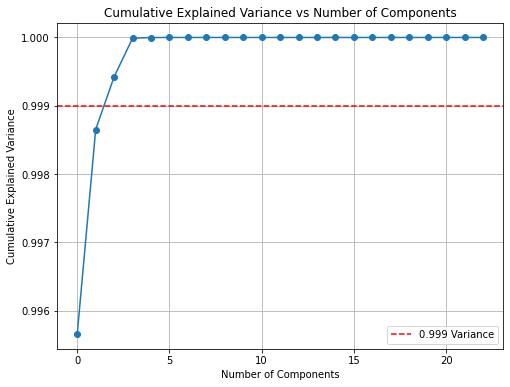

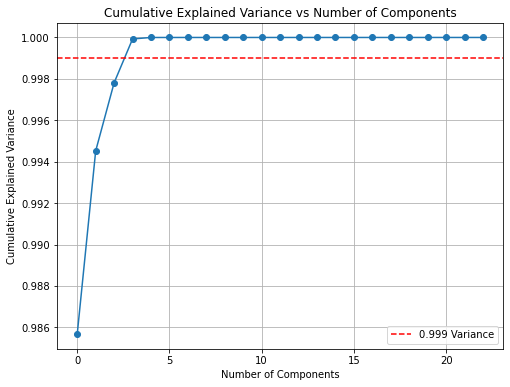

In [53]:
d_raw_train_pca,dimension = perform_PCA(d_raw_train,plot=True)
d_raw_test_pca = perform_PCA(d_raw_test,dimension,plot=True)

In [54]:
print('New shape of PCA transformed data : {} (train)\n{} (test)'.format(d_raw_train_pca.shape,d_raw_test_pca.shape))

New shape of PCA transformed data : (102689, 3) (train)
(18880, 3) (test)


<h3 style="color:red;"> d_raw_norm </h3>

In [55]:
d_raw_train_norm = normalize(d_raw_train)
d_raw_test_norm = normalize(d_raw_test)

In [56]:
d_raw_train_norm.describe()

,duration,land,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,...,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05,1.026890e+05
mean,1.611868e-16,7.391076e-17,1.883772e-16,-2.656690e-16,7.246170e-16,4.442854e-18,-3.231755e-15,-3.471406e-15,5.384094e-16,-8.894390e-16,...,8.523794e-18,-4.637708e-16,9.161921e-15,-1.465292e-14,-3.328893e-14,4.525246e-15,1.027364e-14,1.740086e-14,-5.610738e-15,-3.768907e-15
std,6.471240e-02,1.560117e-02,3.089392e-02,4.997911e-01,2.099677e-01,5.779522e-02,4.711835e-01,4.721683e-01,3.492181e-01,3.527232e-01,...,3.842275e-01,4.399682e-01,4.507179e-01,1.826597e-01,2.116660e-01,7.887652e-02,4.698212e-01,4.712591e-01,3.308764e-01,3.480993e-01
min,-6.557901e-03,-2.434535e-04,-3.256586e-03,-4.854658e-01,-1.594138e-01,-5.793292e-02,-3.482740e-01,-3.465369e-01,-1.471070e-01,-1.486607e-01,...,-7.114170e-01,-4.323933e-01,-4.782945e-01,-8.028679e-02,-7.861222e-02,-2.061126e-02,-3.477984e-01,-3.416289e-01,-1.388672e-01,-1.475034e-01
25%,-6.557901e-03,-2.434535e-04,-3.256586e-03,-4.854658e-01,-1.554999e-01,-4.566298e-02,-3.482740e-01,-3.465369e-01,-1.471070e-01,-1.486607e-01,...,-3.937699e-01,-3.970992e-01,-4.382945e-01,-8.028679e-02,-7.861222e-02,-2.061126e-02,-3.477984e-01,-3.416289e-01,-1.388672e-01,-1.475034e-01
50%,-6.557901e-03,-2.434535e-04,-3.256586e-03,-4.854658e-01,-1.320165e-01,-1.498813e-02,-3.482740e-01,-3.465369e-01,-1.471070e-01,-1.486607e-01,...,2.885830e-01,-2.794522e-01,-2.282945e-01,-3.028679e-02,-7.861222e-02,-2.061126e-02,-3.477984e-01,-3.416289e-01,-1.388672e-01,-1.475034e-01
75%,-6.557901e-03,-2.434535e-04,-3.256586e-03,5.145342e-01,1.204297e-01,3.409162e-02,6.517260e-01,6.534631e-01,-1.471070e-01,-1.486607e-01,...,2.885830e-01,5.676067e-01,5.217055e-01,-1.028679e-02,-5.861222e-02,-6.112631e-04,6.522016e-01,6.583711e-01,-1.388672e-01,-1.475034e-01
max,9.934421e-01,9.997565e-01,9.967434e-01,5.145342e-01,8.405862e-01,9.420671e-01,6.517260e-01,6.534631e-01,8.528930e-01,8.513393e-01,...,2.885830e-01,5.676067e-01,5.217055e-01,9.197132e-01,9.213878e-01,9.793887e-01,6.522016e-01,6.583711e-01,8.611328e-01,8.524966e-01


In [57]:
d_raw_test_norm.describe()

,duration,land,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,...,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04
mean,-3.565831e-17,4.464294e-19,-4.598522e-18,1.952299e-18,-1.143815e-17,-1.802419e-17,2.313195e-16,1.842585e-16,1.883116e-15,6.179261e-16,...,-9.442776e-17,1.269759e-16,-1.128867e-14,9.779978e-15,2.548125e-15,-4.552730e-17,7.554147e-16,4.329576e-16,-4.718930e-15,-3.540147e-15
std,2.643086e-02,1.925214e-02,1.003228e-02,4.992275e-01,2.164287e-01,9.317667e-02,3.189341e-01,3.221585e-01,4.399646e-01,4.404980e-01,...,3.742654e-01,4.383151e-01,4.377730e-01,2.126274e-01,1.933964e-01,4.745807e-02,2.946376e-01,3.042646e-01,4.081721e-01,4.242417e-01
min,-4.480090e-03,-3.707627e-04,-1.246014e-03,-5.280191e-01,-1.273322e-01,-5.982361e-02,-1.228946e-01,-1.237474e-01,-2.846822e-01,-2.808194e-01,...,-7.423602e-01,-5.203890e-01,-5.686647e-01,-8.779820e-02,-5.906621e-02,-1.436441e-02,-1.162135e-01,-1.187214e-01,-2.747410e-01,-2.706748e-01
25%,-4.480090e-03,-3.707627e-04,-1.246014e-03,-5.280191e-01,-1.273322e-01,-5.982361e-02,-1.228946e-01,-1.237474e-01,-2.846822e-01,-2.808194e-01,...,-3.384386e-01,-4.694086e-01,-5.086647e-01,-8.779820e-02,-5.906621e-02,-1.436441e-02,-1.162135e-01,-1.187214e-01,-2.747410e-01,-2.706748e-01
50%,-4.480090e-03,-3.707627e-04,-1.246014e-03,4.719809e-01,-1.155675e-01,-3.297797e-02,-1.228946e-01,-1.237474e-01,-2.846822e-01,-2.808194e-01,...,2.576398e-01,-3.411453e-02,1.913353e-01,-6.779820e-02,-5.906621e-02,-1.436441e-02,-1.162135e-01,-1.187214e-01,-2.747410e-01,-2.706748e-01
75%,-4.480090e-03,-3.707627e-04,-1.246014e-03,4.719809e-01,8.639332e-02,2.742471e-02,-1.228946e-01,-1.237474e-01,6.453178e-01,6.991806e-01,...,2.576398e-01,4.796110e-01,4.313353e-01,-2.779820e-02,-4.906621e-02,5.635593e-03,-1.162135e-01,-1.187214e-01,3.952590e-01,4.193252e-01
max,9.955199e-01,9.996292e-01,9.987540e-01,4.719809e-01,8.726678e-01,9.401764e-01,8.771054e-01,8.762526e-01,7.153178e-01,7.191806e-01,...,2.576398e-01,4.796110e-01,4.313353e-01,9.122018e-01,9.409338e-01,9.856356e-01,8.837865e-01,8.812786e-01,7.252590e-01,7.293252e-01


<h3 style="color:red;"> d_raw_norm_pca </h3>

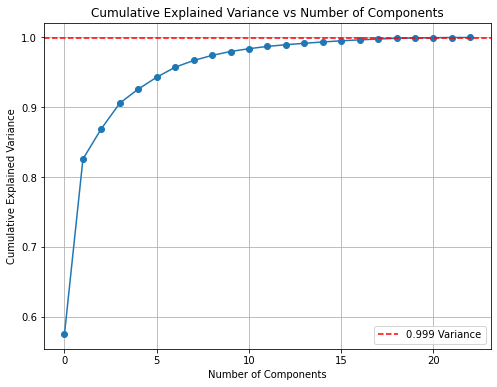

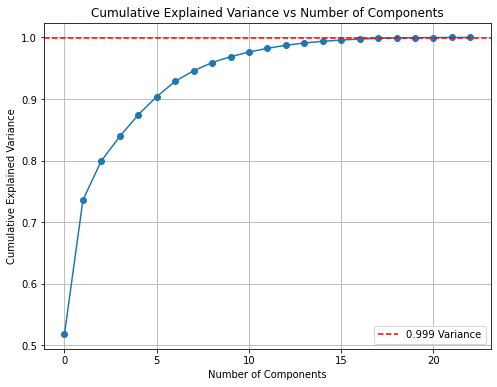

In [58]:
d_raw_train_norm_pca,dim = perform_PCA(d_raw_train_norm,plot=True)
d_raw_test_norm_pca = perform_PCA(d_raw_test_norm,dim,plot=True)

In [59]:
print('New shape of PCA transformed  and normalized data : {} (train)\n{} (test)'.format(d_raw_train_norm_pca.shape,d_raw_test_norm_pca.shape))

New shape of PCA transformed  and normalized data : (102689, 20) (train)
(18880, 20) (test)


<h3 style="color:red;"> d_raw_probs </h3>

In [60]:
matrix, train_no = GMM_Combine_Transform(d_raw_train, d_raw_train, 50)
d_train_probs = pd.DataFrame(matrix)

matrix, test_no = GMM_Combine_Transform(d_raw_train, d_raw_test, 50)
d_test_probs = pd.DataFrame(matrix)

100%|██████████| 18880/18880 [05:50<00:00, 53.79it/s]


<h3 style="color:red;"> d_raw_pca_probs </h3>

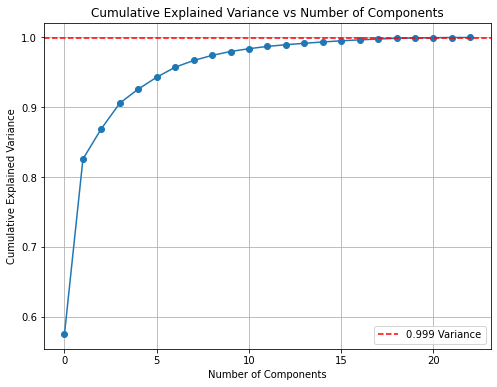

100%|██████████| 102689/102689 [18:40<00:00, 91.66it/s] 


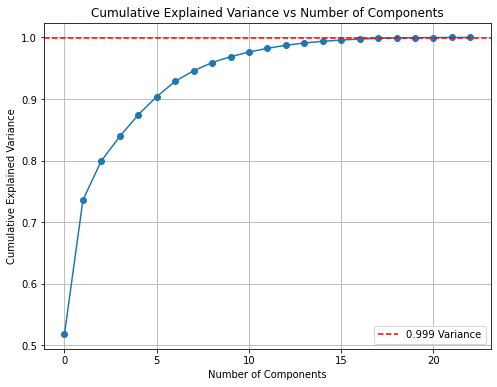

100%|██████████| 18880/18880 [03:06<00:00, 101.00it/s]


In [61]:
# Train data
d_train_pca_probs, dim_train = perform_PCA(d_raw_train,plot=True)
matrix_train, train_no = GMM_Combine_Transform(d_train_pca_probs, d_train_pca_probs, 50)
d_train_pca_probs = pd.DataFrame(matrix_train)

# Test data
d_test_pca_probs = perform_PCA(d_raw_test,dim_train,plot=True)
matrix_test, test_no = GMM_Combine_Transform(d_train_pca_probs, d_test_pca_probs, 50)
d_test_pca_probs = pd.DataFrame(matrix_test)


<h3 style="color:red;"> d_norm_probs </h3>

In [62]:
# Train data
d_train_norm_probs = normalize(d_raw_train)
matrix_train, train_no = GMM_Combine_Transform(d_train_norm_probs, d_train_norm_probs, 50)
d_train_norm_probs = pd.DataFrame(matrix_train)

# Test data
d_test_norm_probs = normalize(d_raw_test)
matrix_test, test_no = GMM_Combine_Transform(d_train_norm_probs, d_test_norm_probs, 50)
d_test_norm_probs = pd.DataFrame(matrix_test)

100%|██████████| 18880/18880 [03:31<00:00, 89.27it/s] 


<h3 style="color:red;"> d_norm_pca_probs </h3>

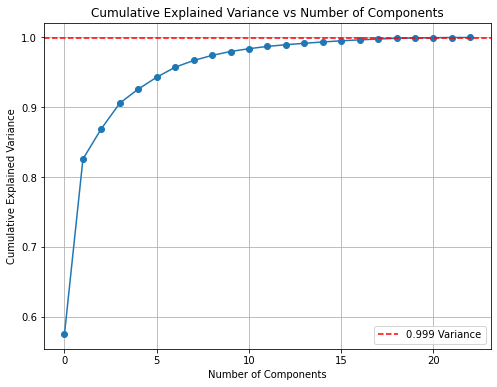

100%|██████████| 102689/102689 [16:33<00:00, 103.41it/s]


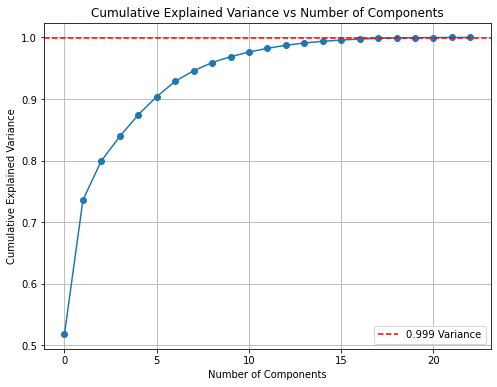

100%|██████████| 18880/18880 [02:58<00:00, 105.48it/s]


In [63]:
d_train_norm_pca_probs = normalize(d_raw_train)
d_train_norm_pca_probs, dim_train = perform_PCA(d_train_norm_pca_probs,plot=True)
matrix_train, train_no = GMM_Combine_Transform(d_train_norm_pca_probs, d_train_norm_pca_probs, 50)
d_train_norm_pca_probs = pd.DataFrame(matrix_train)

d_test_norm_pca_probs = normalize(d_raw_test)
d_test_norm_pca_probs = perform_PCA(d_test_norm_pca_probs,dim_train,plot=True)
matrix_test, test_no = GMM_Combine_Transform(d_train_norm_pca_probs, d_test_norm_pca_probs, 50)
d_test_norm_pca_probs = pd.DataFrame(matrix_test)


<p><h1 style="color:red;font-weight:bolder;">Modeling</h1></p>

<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Now that the DataSets are ready , we're going to define the functions related to the modeling 🔎 </center>
    </h1>
</div>

<h3 style="color:blue;"><b> Voting </b></h3>

In [64]:
def voting(data_train, data_test, min_abnormal_features=10, threshold=50):
    predictions = []

    for idx in tqdm(range(len(data_test))):
        values = list(data_test.iloc[idx, :])
        abnormal_count = 0

        for i in range(len(data_test.columns)):
            mean = data_train.iloc[:, i].mean()
            std = data_train.iloc[:, i].std()

            z_score = (values[i] - mean) / std
            prob = (1 - norm.cdf(z_score)) * 100

            if prob <= threshold:
                abnormal_count += 1

        if abnormal_count > min_abnormal_features:
            predictions.append(1)
        else:
            predictions.append(0)

    return predictions


<h3 style="color:blue;"><b> KM-D </b></h3>

In [65]:
def kmd_model(test_data, train_data, model, threshold_dis):
    kmd_d_raw_preds = []

    for idx in tqdm(range(len(test_data))):
        c1 = np.array(test_data.iloc[idx, :])
        c2 = model.cluster_centers_[0]
        temp = c1 - c2
        euclid_dist = np.sqrt(np.dot(temp.T, temp))

        if euclid_dist > threshold_dis:
            kmd_d_raw_preds.append(1)
        else:
            kmd_d_raw_preds.append(0)

    return kmd_d_raw_preds

<h3 style="color:blue;"><b> SVM </b></h3>

In [66]:
def SVM_model(train_data, train_target, test_data):
    model = SVC()
    model.fit(train_data, train_target)
    predictions = model.predict(test_data)
    return predictions

<h3 style="color:blue;"><b> KM-C </b></h3>

In [67]:
def kmeans_standard_clustering(train_data, test_data):
    # Fitting KMeans model on the training data
    kmeans = KMeans(n_clusters=2, n_init=10).fit(train_data)
    # Change n_init to an appropriate number, such as 10, or adjust based on your needs

    # Predicting clusters for the test data
    kmeans_preds = kmeans.predict(test_data)
    
    return kmeans_preds


<h3 style="color:blue;"><b> Decision Tree (Standard) </b></h3>

In [68]:
def default_decision_tree(train_data, train_target, test_data):
    # Creating and training the Decision Tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(train_data, train_target)
    
    # Predicting using the trained model
    predictions = clf.predict(test_data)
    
    return predictions

<h3 style="color:blue;"><b> MLP </b></h3>

In [69]:
def mlp_model(train_data, train_target, test_data):
    # Creating an MLP with a hidden layer of 100 neurons and an output layer with 2 cells
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
    
    # Fitting the model on the training data and target
    model.fit(train_data, train_target)
    
    # Making predictions on the test data
    predictions = model.predict(test_data)
    
    return predictions


<h2 style="color:green;"> Voting </h2>

<h3 style="color:red;"> d_raw_probs </h3>

In [186]:
voting_d_raw_probs_predictions = voting(d_train_probs,d_test_probs,min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [03:24<00:00, 92.46it/s]


<h3 style="color:red;"> d_pca_probs </h3>

In [71]:
voting_d_pca_probs_predicitons = voting(d_train_pca_probs,d_test_pca_probs,min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [03:10<00:00, 98.97it/s] 


<h3 style="color:red;"> d_norm_probs </h3>

In [72]:
voting_d_norm_probs_predicitons = voting(d_train_norm_probs,d_test_norm_probs,min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [03:39<00:00, 85.89it/s]


<h3 style="color:red;"> d_norm_pca_probs </h3>

In [73]:
voting_d_norm_pca_probs_predicitons = voting(d_train_norm_pca_probs,d_test_norm_pca_probs,min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [03:09<00:00, 99.87it/s] 


<h2 style="color:green;"> KM-D </h2>

<h3 style="color:red;"> d_raw </h3>

In [74]:
kmeans = KMeans(n_clusters=1,random_state=0,n_init=10).fit(d_raw_train)
kmd_d_raw_predictions = kmd_model(d_raw_test, d_raw_train,kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 18222.09it/s]


<h3 style="color:red;"> d_raw_pca </h3>

In [75]:
kmeans = KMeans(n_clusters=1,random_state=0,n_init=10).fit(d_raw_train_pca)
kmd_d_raw_pca_predictions = kmd_model(d_raw_test_pca, d_raw_train_pca,kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 17715.63it/s]


<h3 style="color:red;"> d_raw_norm </h3>

In [76]:
kmeans = KMeans(n_clusters=1,random_state=0,n_init=10).fit(d_raw_train_norm)
kmd_d_raw_norm_predictions = kmd_model(d_raw_test_norm, d_raw_train_norm,kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 17699.40it/s]


<h3 style="color:red;"> d_raw_norm_pca </h3>

In [77]:
kmeans = KMeans(n_clusters=1,random_state=0,n_init=10).fit(d_raw_train_norm_pca)
kmd_d_raw_norm_pca_predictions = kmd_model(d_raw_test_norm_pca, d_raw_train_norm_pca,kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 18140.46it/s]


<h3 style="color:red;"> d_raw_probs </h3>

In [78]:
kmeans = KMeans(n_clusters=1,random_state=0,n_init=10).fit(d_train_probs)
kmd_d_probs_predictions = kmd_model(d_test_probs, d_train_probs,kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 18208.33it/s]


<h3 style="color:red;"> d_raw_pca_probs </h3>

In [79]:
kmeans = KMeans(n_clusters=1,random_state=0,n_init=10).fit(d_train_pca_probs)
kmd_d_pca_probs_predictions = kmd_model(d_test_pca_probs, d_train_pca_probs,kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 18240.22it/s]


<h3 style="color:red;"> d_norm_probs </h3>

In [80]:
kmeans = KMeans(n_clusters=1,random_state=0,n_init=10).fit(d_train_norm_probs)
kmd_d_norm_probs_predictions = kmd_model(d_test_norm_probs, d_train_norm_probs,kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 17338.97it/s]


<h3 style="color:red;"> d_norm_pca_probs </h3>

In [81]:
kmeans = KMeans(n_clusters=1,random_state=0,n_init=10).fit(d_train_norm_pca_probs)
kmd_d_norm_pca_probs_predictions = kmd_model(d_test_norm_pca_probs, d_train_norm_pca_probs,kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 18131.78it/s]


<h2 style="color:green;"> SVM </h2>

<h3 style="color:red;"> d_raw </h3>

In [82]:
svm_d_raw_predictions = SVM_model(d_raw_train,train_target,d_raw_test)

<h3 style="color:red;"> d_raw_pca </h3>

In [83]:
svm_d_raw_pca_predictions = SVM_model(d_raw_train_pca,train_target,d_raw_test_pca)

<h3 style="color:red;">  d_raw_norm </h3>

In [84]:
svm_d_raw_norm_predictions = SVM_model(d_raw_train_norm,train_target,d_raw_test_norm)

<h3 style="color:red;">  d_raw_norm_pca </h3>

In [85]:
svm_d_raw_norm_pca_predictions = SVM_model(d_raw_train_norm_pca,train_target,d_raw_test_norm_pca)

<h3 style="color:red;">  d_raw_probs </h3>

In [86]:
svm_d_raw_probs_predictions = SVM_model(d_train_probs,train_target,d_test_probs)

<h3 style="color:red;">   d_raw_pca_probs </h3>

In [87]:
svm_d_pca_probs_predictions = SVM_model(d_train_pca_probs,train_target,d_test_pca_probs)

<h3 style="color:red;">   d_norm_probs </h3>

In [88]:
svm_d_norm_probs_predictions = SVM_model(d_train_norm_probs,train_target,d_test_norm_probs)

<h3 style="color:red;">   d_norm_pca_probs </h3>

In [89]:
svm_d_norm_pca_probs_predictions = SVM_model(d_train_norm_pca_probs,train_target,d_test_norm_pca_probs)

<h2 style="color:green;"> KM-C </h2>

<h3 style="color:red;"> d_raw </h3>

In [131]:
kmc_d_raw_predictions = kmeans_standard_clustering(d_raw_train,d_raw_test)

<h3 style="color:red;"> d_raw_pca </h3>

In [132]:
kmc_d_raw_pca_predictions = kmeans_standard_clustering(d_raw_train_pca,d_raw_test_pca)

<h3 style="color:red;"> d_raw_norm </h3>

In [133]:
kmc_d_raw_norm_predictions = kmeans_standard_clustering(d_raw_train_norm,d_raw_test_norm)

<h3 style="color:red;"> d_raw_norm_pca </h3>

In [134]:
kmc_d_raw_norm_pca_predictions = kmeans_standard_clustering(d_raw_train_norm_pca,d_raw_test_norm_pca)

<h3 style="color:red;"> d_raw_probs </h3>

In [175]:
kmc_d_probs_predictions = kmeans_standard_clustering(d_train_probs,d_test_probs)

<h3 style="color:red;"> d_raw_pca_probs </h3>

In [170]:
kmc_d_pca_probs_predictions = kmeans_standard_clustering(d_train_pca_probs,d_test_pca_probs)

<h3 style="color:red;"> d_raw_norm_probs </h3>

In [171]:
kmc_d_norm_probs_predictions = kmeans_standard_clustering(d_train_norm_probs,d_test_norm_probs)

<h3 style="color:red;">  d_raw_norm_pca_probs </h3>


In [172]:
kmc_d_norm_pca_probs_predictions = kmeans_standard_clustering(d_train_norm_pca_probs,d_test_norm_pca_probs)

<h2 style="color:green;"> Decision Tree </h2>

<h3 style="color:red;">  d_raw </h3>

In [137]:
dt_d_raw_predictions = default_decision_tree(d_raw_train,train_target,d_raw_test)

<h3 style="color:red;">  d_raw_pca </h3>

In [138]:
dt_d_raw_pca_predictions = default_decision_tree(d_raw_train_pca,train_target,d_raw_test_pca)

<h3 style="color:red;">  d_raw_norm </h3>

In [139]:
dt_d_raw_norm_predictions = default_decision_tree(d_raw_train_norm,train_target,d_raw_test_norm)

<h3 style="color:red;">  d_raw_norm_pca </h3>

In [140]:
dt_d_raw_norm_pca_predictions = default_decision_tree(d_raw_train_norm_pca,train_target,d_raw_test_norm_pca)

<h3 style="color:red;">  d_raw_probs</h3>

In [141]:
dt_d_raw_probs_predictions = default_decision_tree(d_train_probs,train_target,d_test_probs)

<h3 style="color:red;">  d_raw_pca_probs </h3>

In [142]:
dt_d_pca_probs_predictions = default_decision_tree(d_train_pca_probs,train_target,d_test_pca_probs)

<h3 style="color:red;">  d_raw_norm_probs </h3>

In [143]:
dt_d_norm_probs_predictions = default_decision_tree(d_train_norm_probs,train_target,d_test_norm_probs)

<h3 style="color:red;">  d_norm_pca_probs </h3>

In [144]:
dt_d_norm_pca_probs_predictions = default_decision_tree(d_train_norm_pca_probs,train_target,d_test_norm_pca_probs)

<h2 style="color:green;"> MLP </h2>

<h3 style="color:red;">  d_raw </h3>

In [106]:
mlp_d_raw_predictions = mlp_model(d_raw_train,train_target,d_raw_test)

<h3 style="color:red;">  d_raw_pca </h3>

In [107]:
mlp_d_raw_pca_predictions = mlp_model(d_raw_train_pca,train_target,d_raw_test_pca)

<h3 style="color:red;">  d_raw_norm</h3>

In [108]:
mlp_d_raw_norm_predictions = mlp_model(d_raw_train_norm,train_target,d_raw_test_norm)

<h3 style="color:red;">  d_raw_norm_pca </h3>

In [109]:
mlp_d_raw_norm_pca_predictions = mlp_model(d_raw_train_norm_pca,train_target,d_raw_test_norm_pca)

<h3 style="color:red;">  d_probs </h3>

In [110]:
mlp_d_probs_predictions = mlp_model(d_train_probs,train_target,d_test_probs)

<h3 style="color:red;"> d_pca_probs</h3>

In [111]:
mlp_d_pca_probs_predictions = mlp_model(d_train_pca_probs,train_target,d_test_pca_probs)

<h3 style="color:red;"> d_norm_probs</h3>

In [112]:
mlp_d_norm_probs_predictions = mlp_model(d_train_norm_probs,train_target,d_test_norm_probs)

<h3 style="color:red;"> d_norm_pca_probs</h3>

In [113]:
mlp_d_norm_pca_probs_predictions = mlp_model(d_train_norm_pca_probs,train_target,d_test_norm_pca_probs)

<p><h1 style="color:red;font-weight:bolder;">Evaluation</h1></p>


### --> Let's define the functions needed for the evaluation

### 1 -  F1_score

In [114]:
def f1(y_test,predictions) :
    return f1_score(y_test,predictions)

### 2 -  Sensitivity

In [115]:
def sensitivity(y_test, predictions):
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    return tp / (tp + fn)

### 3 -  CAP

In [121]:
def cap(y_test, predictions, b):
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    if tp + fp == 0:
        ppv = 0  # Handling division by zero for Precision
    else:
        ppv = tp / (tp + fp)  # Calculating Precision (PPV)
        
    if tn + fn == 0:
        npv = 0  # Handling division by zero for NPV
    else:
        npv = tn / (tn + fn)  # Calculating Negative Predictive Value (NPV)

    numerator = (b**2 + 1) * ppv * npv
    denominator = (b**2 * ppv) + npv
    
    if denominator == 0:
        cap_value = 0  # Handling division by zero for CAP
    else:
        cap_value = numerator / denominator
    
    return cap_value

In [122]:
print('Percentage of Attack in the whole dataset : ',(train_target[train_target == 1].sum() + test_target[test_target == 1].sum()) / (train_target.shape[0]+test_target.shape[0]))

Percentage of Attack in the whole dataset :  0.49459154883235035


--> B = 0.49 ~ 0.5

### Evaluation of the models applied on  d_raw

#### KM-D

In [123]:
print("Evaluation of KM-D on d_raw : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmd_d_raw_predictions),sensitivity(test_target,kmd_d_raw_predictions),cap(test_target,kmd_d_raw_predictions,2)))

Evaluation of KM-D on d_raw : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_target,kmd_d_raw_predictions)

array([[    0,  7842],
       [    0, 11038]], dtype=int64)

#### KM-C

In [135]:
print("Evaluation of KM-C on d_raw : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmc_d_raw_predictions),sensitivity(test_target,kmc_d_raw_predictions),cap(test_target,kmc_d_raw_predictions,0.5)))

Evaluation of KM-C on d_raw : 
F1_score : 0.614185961043734
Sensitivity : 0.7570211994926617
CAP : 0.044684609618059055


#### Decison Tree

In [145]:
print("Evaluation of Decision Tree on d_raw : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,dt_d_raw_predictions),sensitivity(test_target,dt_d_raw_predictions),cap(test_target,dt_d_raw_predictions,0.5)))

Evaluation of Decision Tree on d_raw : 
F1_score : 0.7302162345748896
Sensitivity : 0.5843449900344265
CAP : 0.8758054295996353


#### SVM

In [146]:
print("Evaluation of SVM on d_raw : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,svm_d_raw_predictions),sensitivity(test_target,svm_d_raw_predictions),cap(test_target,svm_d_raw_predictions,0.5)))

Evaluation of SVM on d_raw : 
F1_score : 0.7736807242216825
Sensitivity : 0.6348976263815909
CAP : 0.8995261029192209


#### MLP

In [147]:
print("Evaluation of MLP on d_raw : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,mlp_d_raw_predictions),sensitivity(test_target,mlp_d_raw_predictions),cap(test_target,mlp_d_raw_predictions,0.5)))

Evaluation of MLP on d_raw : 
F1_score : 0.7841424124938569
Sensitivity : 0.6504801594491756
CAP : 0.9007509353494735


### Evaluation of the models applied on  d_raw_pca

#### KM-D

In [152]:
print("Evaluation of KM-D on d_raw : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmd_d_raw_predictions),sensitivity(test_target,kmd_d_raw_predictions),cap(test_target,kmd_d_raw_predictions,0.5)))


Evaluation of KM-D on d_raw : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### KM-C

In [153]:
print("Evaluation of KM-C on d_raw_pca : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmc_d_raw_pca_predictions),sensitivity(test_target,kmc_d_raw_pca_predictions),cap(test_target,kmc_d_raw_pca_predictions,0.5)))

Evaluation of KM-C on d_raw_pca : 
F1_score : 0.0001810610175629187
Sensitivity : 9.05961224859576e-05
CAP : 0.14531217543547287


#### Decision Tree

In [154]:
print("Evaluation of Decision Tree on d_raw_pca : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,dt_d_raw_pca_predictions),sensitivity(test_target,dt_d_raw_pca_predictions),cap(test_target,dt_d_raw_pca_predictions,0.5)))

Evaluation of Decision Tree on d_raw_pca : 
F1_score : 0.1317157712305026
Sensitivity : 0.07229570574379417
CAP : 0.6440942119506284


#### SVM

In [155]:
print("Evaluation of SVM on d_raw_pca : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,svm_d_raw_pca_predictions),sensitivity(test_target,svm_d_raw_pca_predictions),cap(test_target,svm_d_raw_pca_predictions,0.5)))

Evaluation of SVM on d_raw_pca : 
F1_score : 0.7228456014362656
Sensitivity : 0.5836202210545388
CAP : 0.8581390263608049


#### MLP

In [156]:
print("Evaluation of MLP on d_raw_pca : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,mlp_d_raw_pca_predictions),sensitivity(test_target,mlp_d_raw_pca_predictions),cap(test_target,mlp_d_raw_pca_predictions,0.5)))

Evaluation of MLP on d_raw_pca : 
F1_score : 0.7402030346032091
Sensitivity : 0.6143323065772784
CAP : 0.8508084891013719


### Evaluation of the models applied on d_raw_norm

#### KM-D

In [157]:
print("Evaluation of KM-D on d_raw_norm : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmd_d_raw_norm_predictions),sensitivity(test_target,kmd_d_raw_norm_predictions),cap(test_target,kmd_d_raw_norm_predictions,0.5)))

Evaluation of KM-D on d_raw_norm : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### KM-C

In [158]:
print("Evaluation of KM-C on d_raw_norm : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmc_d_raw_norm_predictions),sensitivity(test_target,kmc_d_raw_norm_predictions),cap(test_target,kmc_d_raw_norm_predictions,0.5)))

Evaluation of KM-C on d_raw_norm : 
F1_score : 0.614185961043734
Sensitivity : 0.7570211994926617
CAP : 0.044684609618059055


#### Decision Tree

In [159]:
print("Evaluation of Decision Tree on d_raw_norm : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,dt_d_raw_norm_predictions),sensitivity(test_target,dt_d_raw_norm_predictions),cap(test_target,dt_d_raw_norm_predictions,0.5)))

Evaluation of Decision Tree on d_raw_norm : 
F1_score : 0.7847229693383538
Sensitivity : 0.6608081174125747
CAP : 0.8872867189549891


#### SVM

In [160]:
print("Evaluation of SVM on d_raw_norm : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,svm_d_raw_norm_predictions),sensitivity(test_target,svm_d_raw_norm_predictions),cap(test_target,svm_d_raw_norm_predictions,0.5)))

Evaluation of SVM on d_raw_norm : 
F1_score : 0.7736807242216825
Sensitivity : 0.6348976263815909
CAP : 0.8995261029192209


#### MLP

In [161]:
print("Evaluation of MLP on d_raw_norm : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,mlp_d_raw_norm_predictions),sensitivity(test_target,mlp_d_raw_norm_predictions),cap(test_target,mlp_d_raw_norm_predictions,0.5)))

Evaluation of MLP on d_raw_norm : 
F1_score : 0.7823944818525209
Sensitivity : 0.647399891284653
CAP : 0.901214200281135


### Evaluation of the models applied on d_raw_norm_pca

#### KM-D

In [162]:
print("Evaluation of kmd on d_raw_norm_pca : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmd_d_raw_norm_pca_predictions),sensitivity(test_target,kmd_d_raw_norm_pca_predictions),cap(test_target,kmd_d_raw_norm_pca_predictions,0.5)))

Evaluation of kmd on d_raw_norm_pca : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### KM-C

In [163]:
print("Evaluation of KM-C on d_raw_norm_pca : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmc_d_raw_norm_pca_predictions),sensitivity(test_target,kmc_d_raw_norm_pca_predictions),cap(test_target,kmc_d_raw_norm_pca_predictions,0.5)))

Evaluation of KM-C on d_raw_norm_pca : 
F1_score : 0.488318790462021
Sensitivity : 0.5500996557347345
CAP : 0.07148713368900823


#### Decision Tree

In [164]:
print("Evaluation of Decision Tree on d_raw_norm_pca : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,dt_d_raw_norm_pca_predictions),sensitivity(test_target,dt_d_raw_norm_pca_predictions),cap(test_target,dt_d_raw_norm_pca_predictions,0.5)))

Evaluation of Decision Tree on d_raw_norm_pca : 
F1_score : 0.7378292507943016
Sensitivity : 0.6522014857764088
CAP : 0.7943681585817011


#### SVM

In [165]:
print("Evaluation of SVM on d_raw_norm_pca : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,svm_d_raw_norm_pca_predictions),sensitivity(test_target,svm_d_raw_norm_pca_predictions),cap(test_target,svm_d_raw_norm_pca_predictions,0.5)))

Evaluation of SVM on d_raw_norm_pca : 
F1_score : 0.7972823510823195
Sensitivity : 0.6857220510962131
CAP : 0.8825022552996975


#### MLP

In [166]:
print("Evaluation of MLP on d_raw_norm_pca : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,mlp_d_raw_norm_pca_predictions),sensitivity(test_target,mlp_d_raw_norm_pca_predictions),cap(test_target,mlp_d_raw_norm_pca_predictions,0.5)))

Evaluation of MLP on d_raw_norm_pca : 
F1_score : 0.8344437208836347
Sensitivity : 0.7545751041855409
CAP : 0.88337813583151


### Evaluation of the models applied on d_probs

#### KM-D

In [168]:
print("Evaluation of KM-D on d_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmd_d_probs_predictions),sensitivity(test_target,kmd_d_probs_predictions),cap(test_target,kmd_d_probs_predictions,0.5)))

Evaluation of KM-D on d_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### KM-C

In [176]:
print("Evaluation of KM-C on d_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmc_d_probs_predictions),sensitivity(test_target,kmc_d_probs_predictions),cap(test_target,kmc_d_probs_predictions,0.5)))

Evaluation of KM-C on d_probs : 
F1_score : 0.7696040586743135
Sensitivity : 0.6321797427070122
CAP : 0.8939305708150226


#### Decision Tree

In [178]:
print("Evaluation of Decision Tree on d_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,dt_d_raw_probs_predictions),sensitivity(test_target,dt_d_raw_probs_predictions),cap(test_target,dt_d_raw_probs_predictions,0.5)))

Evaluation of Decision Tree on d_probs : 
F1_score : 0.7851355730798315
Sensitivity : 0.6584526182279399
CAP : 0.8915329392988445


#### SVM 

In [180]:
print("Evaluation of SVM on d_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,svm_d_raw_probs_predictions),sensitivity(test_target,svm_d_raw_probs_predictions),cap(test_target,svm_d_raw_probs_predictions,0.5)))

Evaluation of SVM on d_probs : 
F1_score : 0.7592675301473872
Sensitivity : 0.6160536329045116
CAP : 0.8945982567175621


#### MLP

In [181]:
print("Evaluation of MLP on d_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,mlp_d_probs_predictions),sensitivity(test_target,mlp_d_probs_predictions),cap(test_target,mlp_d_probs_predictions,0.5)))

Evaluation of MLP on d_probs : 
F1_score : 0.7588862228670276
Sensitivity : 0.6160536329045116
CAP : 0.8936505869362203


#### Voting

In [188]:
print("Evaluation of Voting on d_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,voting_d_raw_probs_predicitons),sensitivity(test_target,voting_d_raw_probs_predicitons),cap(test_target,voting_d_raw_probs_predicitons,0.5)))

Evaluation of Voting on d_probs : 
F1_score : 0.719460082751136
Sensitivity : 0.9609530712085522
CAP : 0.011390639551066832


### Evaluation of the models applied on d_pca_probs

#### KM-D

In [189]:
print("Evaluation of KM-D on d_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmd_d_pca_probs_predictions),sensitivity(test_target,kmd_d_pca_probs_predictions),cap(test_target,kmd_d_pca_probs_predictions,0.5)))

Evaluation of KM-D on d_pca_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### KM-C

In [190]:
print("Evaluation of KM-C on d_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmc_d_pca_probs_predictions),sensitivity(test_target,kmc_d_pca_probs_predictions),cap(test_target,kmc_d_pca_probs_predictions,0.5)))

Evaluation of KM-C on d_pca_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### Decision Tree

In [191]:
print("Evaluation of Decision Tree on d_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,dt_d_pca_probs_predictions),sensitivity(test_target,dt_d_pca_probs_predictions),cap(test_target,dt_d_pca_probs_predictions,0.5)))

Evaluation of Decision Tree on d_pca_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### SVM

In [192]:
print("Evaluation of SVM on d_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,svm_d_pca_probs_predictions),sensitivity(test_target,svm_d_pca_probs_predictions),cap(test_target,svm_d_pca_probs_predictions,0.5)))

Evaluation of SVM on d_pca_probs : 
F1_score : 0.0
Sensitivity : 0.0
CAP : 0.0


#### MLP

In [193]:
print("Evaluation of MLP on d_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,mlp_d_pca_probs_predictions),sensitivity(test_target,mlp_d_pca_probs_predictions),cap(test_target,mlp_d_pca_probs_predictions,0.5)))

Evaluation of MLP on d_pca_probs : 
F1_score : 0.0
Sensitivity : 0.0
CAP : 0.0


#### Voting 

In [195]:
print("Evaluation of Voting on d_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,voting_d_pca_probs_predicitons),sensitivity(test_target,voting_d_pca_probs_predicitons),cap(test_target,voting_d_pca_probs_predicitons,0.5)))

Evaluation of Voting on d_pca_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


### Evaluation of the models applied on d_norm_probs

#### KM-D

In [196]:
print("Evaluation of KM-D on d_norm_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmd_d_norm_probs_predictions),sensitivity(test_target,kmd_d_norm_probs_predictions),cap(test_target,kmd_d_norm_probs_predictions,0.5)))

Evaluation of KM-D on d_norm_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### KM-C

In [197]:
print("Evaluation of KM-C on d_norm_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmc_d_norm_probs_predictions),sensitivity(test_target,kmc_d_norm_probs_predictions),cap(test_target,kmc_d_norm_probs_predictions,0.5)))

Evaluation of KM-C on d_norm_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### Decision Tree

In [198]:
print("Evaluation of Decision Tree on d_norm_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,dt_d_norm_probs_predictions),sensitivity(test_target,dt_d_norm_probs_predictions),cap(test_target,dt_d_norm_probs_predictions,0.5)))

Evaluation of Decision Tree on d_norm_probs : 
F1_score : 0.0
Sensitivity : 0.0
CAP : 0.0


#### SVM

In [199]:
print("Evaluation of SVM on d_norm_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,svm_d_norm_probs_predictions),sensitivity(test_target,svm_d_norm_probs_predictions),cap(test_target,svm_d_norm_probs_predictions,0.5)))

Evaluation of SVM on d_norm_probs : 
F1_score : 0.0
Sensitivity : 0.0
CAP : 0.0


#### MLP

In [200]:
print("Evaluation of MLP on d_norm_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,mlp_d_norm_probs_predictions),sensitivity(test_target,mlp_d_norm_probs_predictions),cap(test_target,mlp_d_norm_probs_predictions,0.5)))

Evaluation of MLP on d_norm_probs : 
F1_score : 0.0
Sensitivity : 0.0
CAP : 0.0


#### Voting

In [202]:
print("Evaluation of Voting on d_norm_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,voting_d_norm_probs_predicitons),sensitivity(test_target,voting_d_norm_probs_predicitons),cap(test_target,voting_d_norm_probs_predicitons,0.5)))

Evaluation of Voting on d_norm_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


### Evaluation of the models applied on d_norm_pca_probs

#### KM-D

In [203]:
print("Evaluation of KM-D on d_norm_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmd_d_norm_pca_probs_predictions),sensitivity(test_target,kmd_d_norm_pca_probs_predictions),cap(test_target,kmd_d_norm_pca_probs_predictions,0.5)))

Evaluation of KM-D on d_norm_pca_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### KM-C

In [204]:
print("Evaluation of KM-C on d_norm_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,kmc_d_norm_pca_probs_predictions),sensitivity(test_target,kmc_d_norm_pca_probs_predictions),cap(test_target,kmc_d_norm_pca_probs_predictions,0.5)))

Evaluation of KM-C on d_norm_pca_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### Decision Tree

In [205]:
print("Evaluation of Decision Tree on d_norm_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,dt_d_norm_pca_probs_predictions),sensitivity(test_target,dt_d_norm_pca_probs_predictions),cap(test_target,dt_d_norm_pca_probs_predictions,0.5)))

Evaluation of Decision Tree on d_norm_pca_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


#### SVM

In [206]:
print("Evaluation of SVM on d_norm_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,svm_d_norm_pca_probs_predictions),sensitivity(test_target,svm_d_norm_pca_probs_predictions),cap(test_target,svm_d_norm_pca_probs_predictions,0.5)))

Evaluation of SVM on d_norm_pca_probs : 
F1_score : 0.0
Sensitivity : 0.0
CAP : 0.0


#### MLP

In [207]:
print("Evaluation of MLP on d_norm_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,mlp_d_norm_pca_probs_predictions),sensitivity(test_target,mlp_d_norm_pca_probs_predictions),cap(test_target,mlp_d_norm_pca_probs_predictions,0.5)))

Evaluation of MLP on d_norm_pca_probs : 
F1_score : 0.0
Sensitivity : 0.0
CAP : 0.0


#### Voting

In [209]:
print("Evaluation of Voting on d_norm_pca_probs : \nF1_score : {}\nSensitivity : {}\nCAP : {}".format(f1(test_target,voting_d_norm_pca_probs_predicitons),sensitivity(test_target,voting_d_norm_pca_probs_predicitons),cap(test_target,voting_d_norm_pca_probs_predicitons,0.5)))

Evaluation of Voting on d_norm_pca_probs : 
F1_score : 0.7378835483655325
Sensitivity : 1.0
CAP : 0.0


---> Based on our findings from evaluating anomaly detection systems, we focused on three key metrics: Sensitivity, representing anomaly detection rates F1-Score, assessing test accuracy and Intrusion Detection Capacity (CAP), reflecting overall model effectiveness.

Across various algorithms, those requiring less training data were prioritized. Notably, instances where algorithms failed to converge to valid solutions were highlighted, as were scenarios where our proposed voting scheme lacked relevance due to non-probabilistic datasets.

Classical approaches of SVM and K-Means struggled without normalized data due to their reliance on distance metrics. Similarly, K-Means for anomaly detection faced convergence issues post PGA transformation. Supervised algorithms generally underperformed compared to unsupervised ones, attributed to differences in attack types between testing and training datasets affecting their ability to generalize. However, supervised algorithms showcased notably higher specificity than unsupervised counterparts.

## Conclusion :

The highest performance was observed with K-Means clusters on the d_raw_pca_probs dataset. Despite this, the voting scheme outperformed KM-C due to superior overall model performance, even though KM-CG demonstrated higher anomaly detection rates. Notably, KM-C required attack information during training and lacked a strictly normal model, whereas the voting scheme relied on computed occurrence probabilities. Fine-tuning the voting scheme's hyperparameters revealed a trade-off between alpha and consensus for optimal performance.